#BHN


# **Rol de la QBO en la asociación entre la Actividad Geomagnética y la Oscilación del Atlántico Norte (NAO)**

# **1. Introducción Teórica**

##**Actividad geomagnética: Ap**

El Sol emite permanentemente radiación electromagnética y partículas. Estas últimas constituyen lo que se conoce como viento solar. Ambos “outputs” solares varían con el tiempo en diversas escalas. La variabilidad más claramente visible es la debida al ciclo de actividad solar, con una periodicidad de ~11 años. Todos los aspectos del Sol, aunque con diferente intensidad, varían a lo largo de este ciclo.

En las regiones polares de la atmósfera, a través de las líneas del campo magnético de la Tierra, precipitan protones y electrones energéticos provenientes del Sol y de la magnetosfera de la Tierra cuyo flujo aumenta con las tormentas geomagnéticas. Indicadores de la actividad geomagnética se derivan de mediciones del campo magnético que realizan observatorios en la superficie de la Tierra, estudiamos el índice Ap.



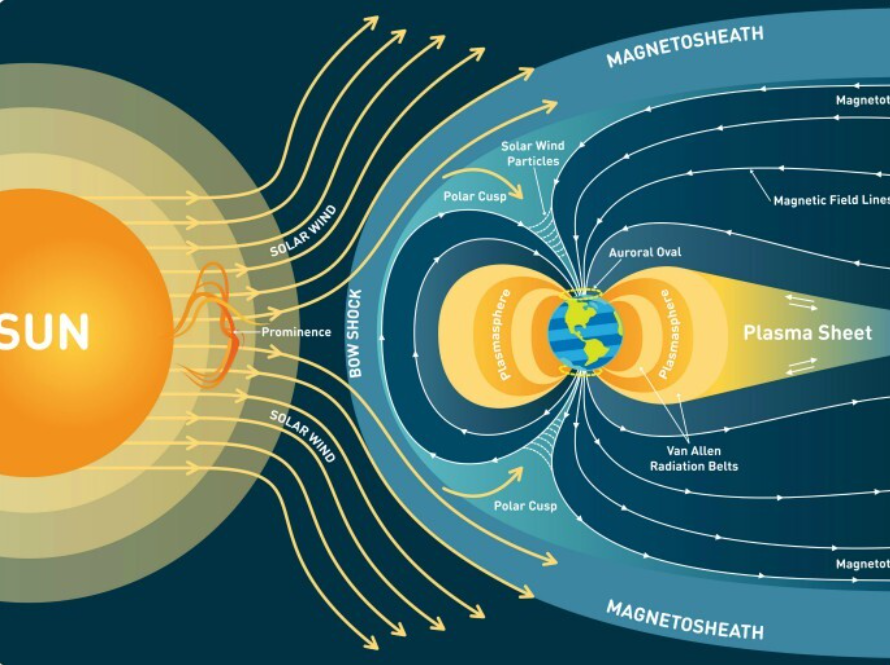

##**NAO**

La NAO es una oscilación meridional en la masa atmosférica sobre el Atlántico Norte con centros de acción en sistemas permanentes de baja presión sobre Groenlandia e Islandia “L”, y de alta presión sobre las islas Azores “H” (islas al oeste de Portugal). Ambos centros de presión varían en intensidad y comienzan a fluctuar entre dos estados: uno denominado “fase positiva” de la NAO durante el cual ambos centros de presión se intensifican, y otro denominado “fase negativa” de la NAO durante el cual los centros presión se debilitan.

Fase Positiva: Da como resultado una corriente de chorro del Atlántico más fuerte y un desplazamiento hacia el norte de la trayectoria de la tormenta. En consecuencia, el norte de Europa experimenta un aumento de las tormentas y las precipitaciones, y temperaturas más cálidas que el promedio que están asociadas con las masas de aire que llegan desde latitudes más bajas. Al mismo tiempo, el sur de Europa experimenta una disminución de las tormentas y precipitaciones por debajo del promedio.

Fase Negativa: la corriente de chorro del Atlántico y la trayectoria de la tormenta tienen una orientación más de oeste a este, y esto trae una disminución de las tormentas, precipitaciones por debajo del promedio y temperaturas más bajas que el promedio en el norte de Europa. Por el contrario, el sur de Europa experimenta un aumento de las tormentas, precipitaciones superiores a la media y temperaturas más cálidas que la media.


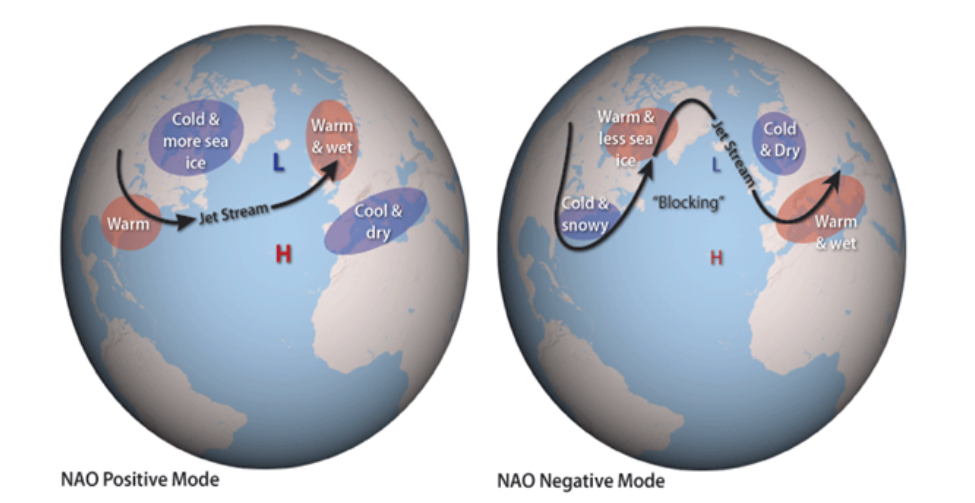

##**QBO**

La QBO es un régimen de vientos alrededor del ecuador geográfico que alterna entre vientos zonales que se propagan desde el este (fase easterly, con velocidad de vientos positiva) y desde el oeste (fase westerly, con velocidad de vientos negativa) en la media y baja estratosfera entre los 10 hPa (∼30 km) y 100 hPa (∼15 km).

Tanto el período como la amplitud de la QBO varían considerablemente de un ciclo a otro. Los períodos pueden variar de 24 a 32 meses, siendo el promedio de ∼28 meses.



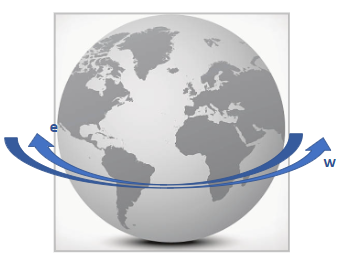

## **Objetivos**

Son numerosos los trabajos que analizan la relación entre la actividad solar, o
parámetros estrechamente relacionados con la actividad solar, y datos climáticos (ver
Lilensten et al., 2016; y sus referencias). Precisamente, la conexión Sol-clima es uno
de los problemas más desafiantes que enfrenta hoy la ciencia del clima.

Se vió que la relación entre la actividad geomagnética y la NAO existe pero no se mantiene constante en el tiempo, esto puede deberse a uno varios factores externos que afecten a esta asociación.

* En mi trabajo de tesis se analizó la posible influencia que tendría la QBO sobre en la asociación entre la actividad geomagnética (Ap) y la NAO, bajo la hipótesis de que esta última se explica a través del vórtice polar.
Se plantea como supuesto, una posible vía estratosférica como conexión de la perturbación de las oscilaciones ecuatoriales QBO en la influencia de la actividad geomagnética a la superficie hemisférica norte representada por el índice NAO. El objetivo ahora es reproducir el trabajo antes realizado, utilizando Python para el análisis.


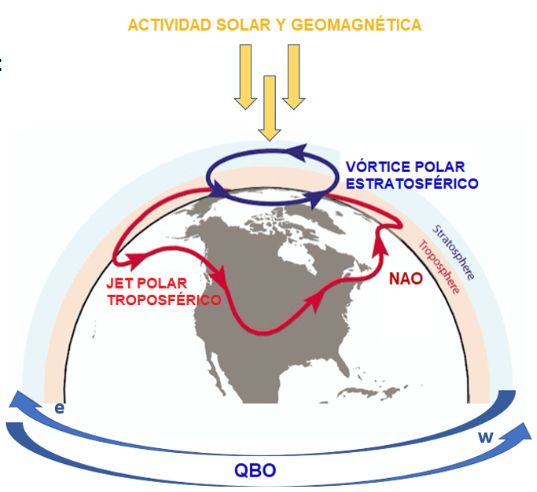


* Aplicar las herramientas proporcionadas por el análisis no supervisado para clusterizar la serie de datos, con el fin de encontrar alguna mejor asociación entre los parámetros investigados (NAO-Ap).

* Analizar cuál de los algoritmos del aprendizaje supervisado para predecir la fase de la NAO, según las condiciones estratosféricas ecuatoriales (QBO=), la intensidad de la actividad geomagnética e incluso con clusters recomendados por el análisis supervisado.

* Utilizar el algoritmo de vecinos cercanos para predecir las fases de la NAO dependiendo de las condiciones de la Actividad geomagnética y la QBO.


-------------------------------------------------

#Funciones

In [ ]:
pip install scipy

In [ ]:
import numpy as np
import scipy.stats as stats

In [ ]:
def corr_sig(serie1,serie2):
  correlation_coefficient, _ = stats.pearsonr(serie1, serie2)
  n = len(serie1)
  degrees_of_freedom = n - 2
  t_statistic = correlation_coefficient * np.sqrt((n - 2) / (1 - correlation_coefficient**2))
  significance_level = 0.05
  critical_t = stats.t.ppf(1 - significance_level / 2, degrees_of_freedom)
  resultado_1 = "correlación:", correlation_coefficient
  if np.abs(t_statistic) > critical_t:
    resultado_2 = "La correlación es significativa al nivel de significancia de: ", significance_level
  else:
    resultado_2 = "La correlación no es significativa al nivel de significancia de: ", significance_level

  return resultado_1, resultado_2

In [ ]:
# def corr_sig(serie1,serie2):
#   t_statistic = (stats.pearsonr(serie1, serie2)) * (np.sqrt((len(serie1) - 2) / ((1 - (stats.pearsonr(serie1, serie2)))**2)))
#   significance_level = 0.05
#   critical_t = stats.t.ppf(1 - significance_level / 2, (len(serie1) - 2))
#   resultado_1 = "correlación:", stats.pearsonr(serie1, serie2)
#   if np.abs(t_statistic) > critical_t:
#     resultado_2 = "La correlación es significativa al nivel de significancia de: ", significance_level
#   else:
#     resultado_2 = "La correlación no es significativa al nivel de significancia de: ", significance_level

#   return resultado_1, resultado_2

In [ ]:
"""
import numpy as np
import scipy.stats as stats

# Datos de las dos series de tiempo
serie1 = invierno['Ap']
serie2 = invierno["NAO(C)"]

# Calcular la correlación de Pearson
correlation_coefficient, _ = stats.pearsonr(serie1, serie2)

# Número de datos (tamaño de la muestra)
n = len(serie1)

# Grados de libertad para la distribución t
degrees_of_freedom = n - 2

# Calcular el estadístico t
t_statistic = correlation_coefficient * np.sqrt((n - 2) / (1 - correlation_coefficient**2))

# Definir un nivel de significancia (por ejemplo, 0.05)
significance_level = 0.05

# Calcular el valor crítico de la distribución t para el nivel de significancia dado y los grados de libertad
critical_t = stats.t.ppf(1 - significance_level / 2, degrees_of_freedom)


print ("correlación:", correlation_coefficient)

# Evaluar la significancia de la correlación
if np.abs(t_statistic) > critical_t:
    print("La correlación es significativa al nivel de significancia de: ", significance_level)
else:
    print("La correlación no es significativa al nivel de significancia de: ", significance_level)

print ()

# Muestro lo calculado
print ("estadístico t:", t_statistic)
print ("t crítico:", critical_t)
"""

'\nimport numpy as np\nimport scipy.stats as stats\n\n# Datos de las dos series de tiempo\nserie1 = invierno[\'Ap\']\nserie2 = invierno["NAO(C)"]\n\n# Calcular la correlación de Pearson\ncorrelation_coefficient, _ = stats.pearsonr(serie1, serie2)\n\n# Número de datos (tamaño de la muestra)\nn = len(serie1)\n\n# Grados de libertad para la distribución t\ndegrees_of_freedom = n - 2\n\n# Calcular el estadístico t\nt_statistic = correlation_coefficient * np.sqrt((n - 2) / (1 - correlation_coefficient**2))\n\n# Definir un nivel de significancia (por ejemplo, 0.05)\nsignificance_level = 0.05\n\n# Calcular el valor crítico de la distribución t para el nivel de significancia dado y los grados de libertad\ncritical_t = stats.t.ppf(1 - significance_level / 2, degrees_of_freedom)\n\n\nprint ("correlación:", correlation_coefficient)\n\n# Evaluar la significancia de la correlación\nif np.abs(t_statistic) > critical_t:\n    print("La correlación es significativa al nivel de significancia de: ", sign

__________________________________________________________

#**2. Base de datos**

Librerias

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

DataFrame

In [ ]:
base = "Base de datos corregida.xlsx"
# datos = pd.read_excel(base,index_col=0, parse_dates=True)   #IMPORTATE:ES PARA SERIES DE TIEMPO (no lo utilizo al final)
datos = pd.read_excel(base)

Visualización

In [ ]:
datos.shape

(823, 33)

In [ ]:
datos.head(-10)

,YY,MM,Ap,F10.7,Rz,70hP QBO,50hP QBO,40hP QBO,30hP QBO,20hP QBO,...,T - 50 - 90 - 10,U - 70 - 90 - 30,U - 70 - 90 - 20,U - 70 - 90 - 10,U - 60 - 90 - 30,U-60-90-20,U - 60 - 90 - 10,U - 50 - 90 - 30,U - 50 - 90 - 20,U - 50 - 90 - 10
0,1953,1,15.000000,77.00,37.9,-60,40,150,220,100,...,-65.572044,17.099764,20.771797,26.994158,17.958738,21.881470,29.205574,16.662970,20.353678,27.815512
1,1953,2,15.000000,67.65,5.9,-2,60,180,210,40,...,-61.376919,24.227238,27.519016,32.893402,23.226624,26.904509,33.193710,20.470903,23.773785,30.161699
2,1953,3,21.000000,66.21,14.7,50,75,175,190,-10,...,-48.509686,23.450537,23.395079,20.609436,22.539648,22.844133,21.133354,19.532501,19.929924,19.160091
3,1953,4,16.000000,81.53,39.6,75,90,170,140,-60,...,-43.850487,5.708556,4.075433,1.390730,5.096400,3.421311,0.888975,4.696794,3.364258,1.400039
4,1953,5,16.000000,74.10,18.3,95,110,185,110,-120,...,-43.428078,-3.450979,-4.290005,-4.428837,-4.033610,-5.081587,-5.675729,-3.758072,-4.808142,-5.409438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,2020,5,3.741935,70.76,0.2,-55,-189,-263,-17,-36,...,-37.743740,-0.979623,-2.420740,-4.294068,-2.107431,-4.034279,-6.679163,-2.522998,-4.811106,-7.734581
809,2020,6,3.733333,71.91,5.8,-93,-226,-177,57,-3,...,-33.538345,-3.009363,-4.235060,-5.919622,-4.397811,-6.041597,-8.340134,-5.283920,-7.241200,-9.912658
810,2020,7,4.354839,71.73,6.1,-155,-169,-24,88,11,...,-33.768459,-3.852135,-4.362887,-4.969832,-4.725965,-5.666134,-6.942067,-5.341701,-6.733276,-8.667617
811,2020,8,5.645161,73.45,7.5,-144,-21,87,104,43,...,-38.497776,-1.284292,-1.410111,-1.030200,-1.216144,-1.554197,-1.554427,-1.316885,-1.977339,-2.491617


In [ ]:
datos.info()
#no tengo datos faltates
#En esta base de datos se tiene los diferentes índices de act solar y geomagnética, QBO, NAO y datos de vientos y temperaturas del vórtice polar a diferentes alturas y latitudes
#Tengo muchísimos datos, me quedo con las columnas más representativas: 0,1,2,8,13. Con el fin de simplificar el proceso, aunque si se quisiera se puede repetir para analizar todos los datos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YY                823 non-null    int64  
 1   MM                823 non-null    int64  
 2   Ap                823 non-null    float64
 3   F10.7             823 non-null    float64
 4   Rz                823 non-null    float64
 5   70hP QBO          823 non-null    int64  
 6   50hP QBO          823 non-null    int64  
 7   40hP QBO          823 non-null    int64  
 8   30hP QBO          823 non-null    int64  
 9   20hP QBO          823 non-null    int64  
 10  15hP QBO          823 non-null    int64  
 11  AO                823 non-null    float64
 12  NAO(A)            823 non-null    float64
 13  NAO(C)            823 non-null    float64
 14  NAO(D)            823 non-null    float64
 15  T-70-90-30        823 non-null    float64
 16  T-70-90-20        823 non-null    float64
 1

In [ ]:
datos.duplicated().sum()
#No hay datos duplicados

0

In [ ]:
# MATRIZ DE CORRELACIÓN GRANDE
"""
plt.figure(figsize=(30,30))
sns.heatmap(datos.drop(columns=['YY']).drop(columns=['MM']).corr(), cmap= "magma", annot = True),plt.title("Matriz de Correlación")
"""
#Con esto podría estudiar con cuales índices hay mayores correlaciones y realizar mi estudio minucioso con esos datos.
#De alguna manera es lo que en realidad hice, solo que, ya sabía cuales son los mejores índices para esto: Ap, NAO(C) Y QBO 30hPa
#Esta matriz es muy grande ya que no solo tiene los diferentes índices de act geomagnética, QBO y NAO, sino que también tiene los datos de vientos y temperaturas del vórtice polar a diferentes alturas y latitudes

'\nplt.figure(figsize=(30,30))\nsns.heatmap(datos.drop(columns=[\'YY\']).drop(columns=[\'MM\']).corr(), cmap= "magma", annot = True),plt.title("Matriz de Correlación")\n'

## **Nuevas bases de datos:**

*Solo me quedo con una columna de cada parámetro: YY, Ap, 30hP QBO, NAO(C)

*promedios inviernos (DJFM)

In [ ]:
# Primero separo las columnas que voy a estudiar y los meses de invierno(DEFM):
#Filas: meses 12,1,2,3
#Columnas: 0,1,2,8,13

enero2=datos.loc[datos["MM"]==1,["YY","MM","Ap",'30hP QBO',"NAO(C)"]]
febrero2=datos.loc[datos["MM"]==2,["YY","MM","Ap",'30hP QBO', "NAO(C)"]]
marzo2=datos.loc[datos["MM"]==3,["YY","MM","Ap",'30hP QBO', "NAO(C)"]]
diciembre2=datos.loc[datos["MM"]==12,["YY","MM","Ap",'30hP QBO',"NAO(C)"]]


# Ahora quiero sacar los promedios de los meses de invierno pero tengo que cuidar de promediar el mes de Diciembre de un año con los de Enero-Febrero-Marzo del siguiente
# TENGO Q COORDINAR DICIEMBRE - SE ME OCURRE MODIFICAR DICIEMBRE2 PARA COMBINARLO CON LOS AÑOS DE EFM  (AGREGO +1 A LOS YY DE DICIEMBRE)
diciembre3=diciembre2  #para no modificar diciembre2 (quizas analizo cada mes después)
diciembre3_array=diciembre3.to_numpy()
#hago matriz con 1 en yy y 0 en el resto
a=np.zeros((68, 5))
a[:,0]=1
#Ahora sumo la matriz a con la de diciembre para que cada elemento de YY ahora sea YY+1
diciembre3_array1=diciembre3_array + a
#paso a dataframe
diciembre4=pd.DataFrame(diciembre3_array1,columns = ['YY', 'MM', 'Ap','30hP QBO', 'NAO(C)'])


#Junto todos los meses de invierno
meses_invierno=pd.concat([diciembre4,enero2,febrero2,marzo2],ignore_index=True)


# Ahora si saco los promedios de los meses de invierno

#quiero el número de veces que hace falta sacar el promedio, lo hago sabiendo la cantidad de años:
m=meses_invierno["YY"].min()
m2=meses_invierno["YY"].max()
n=int(m2-m)
# print(n) #68

invierno00=np.zeros((n,5))

for i in range(0,n):
  year=meses_invierno.loc[meses_invierno["YY"]==m+i,:]
  prom=year.mean()
  invierno00[i:]=year.mean()

#paso a dataframe
invierno00=pd.DataFrame(invierno00,columns = ['YY', 'MM', 'Ap','30hP QBO', 'NAO(C)'])

#descarto 1953 ya que no tengo dato de diciembre del 92 y saco MM
invierno0= invierno00.drop([0],axis=0)
invierno=invierno0.drop(columns=['MM'])

In [ ]:
invierno.head(-1)

,YY,Ap,30hP QBO,NAO(C)
1,1954.0,12.000000,-132.50,0.1325
2,1955.0,11.000000,98.25,-1.2100
3,1956.0,15.250000,-34.25,-0.8000
4,1957.0,17.500000,-6.50,1.6500
5,1958.0,21.500000,64.00,-0.2650
...,...,...,...,...
62,2015.0,11.673963,-293.50,2.0400
63,2016.0,11.031702,76.25,1.8325
64,2017.0,10.651786,169.25,1.1750
65,2018.0,6.798099,-284.50,0.4000


In [ ]:
invierno.describe().T        #std:desvío estandar

,count,mean,std,min,25%,50%,75%,max
YY,67.0,1987.000000,19.485037,1954.0000,1970.500,1987.00,2003.50,2020.00
Ap,67.0,12.532732,4.521306,3.7500,9.375,12.00,16.25,22.00
30hP QBO,67.0,-34.242537,152.315984,-313.2500,-176.875,0.00,95.00,169.25
NAO(C),67.0,0.423843,1.223174,-2.7075,-0.440,0.33,1.45,2.86


In [ ]:
# Se pueden observar valores máximos y mínimos muy diferentes entre los diferentes parámetros. Es necesario normalizar.

Gráficos

<Axes: >

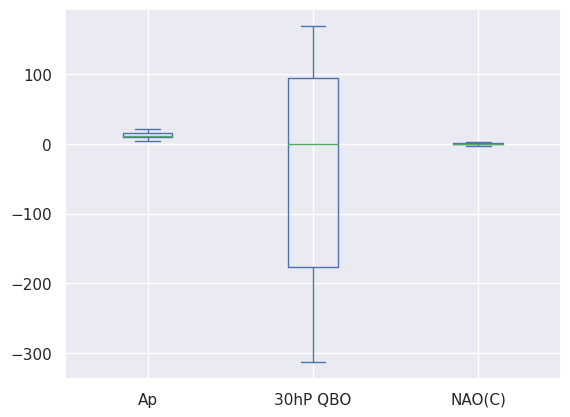

In [ ]:
invierno.drop(columns=["YY"]).plot.box()
# invierno["Ap"].plot.box() #si quisiera solo uno

In [ ]:
# No se ven Outliers

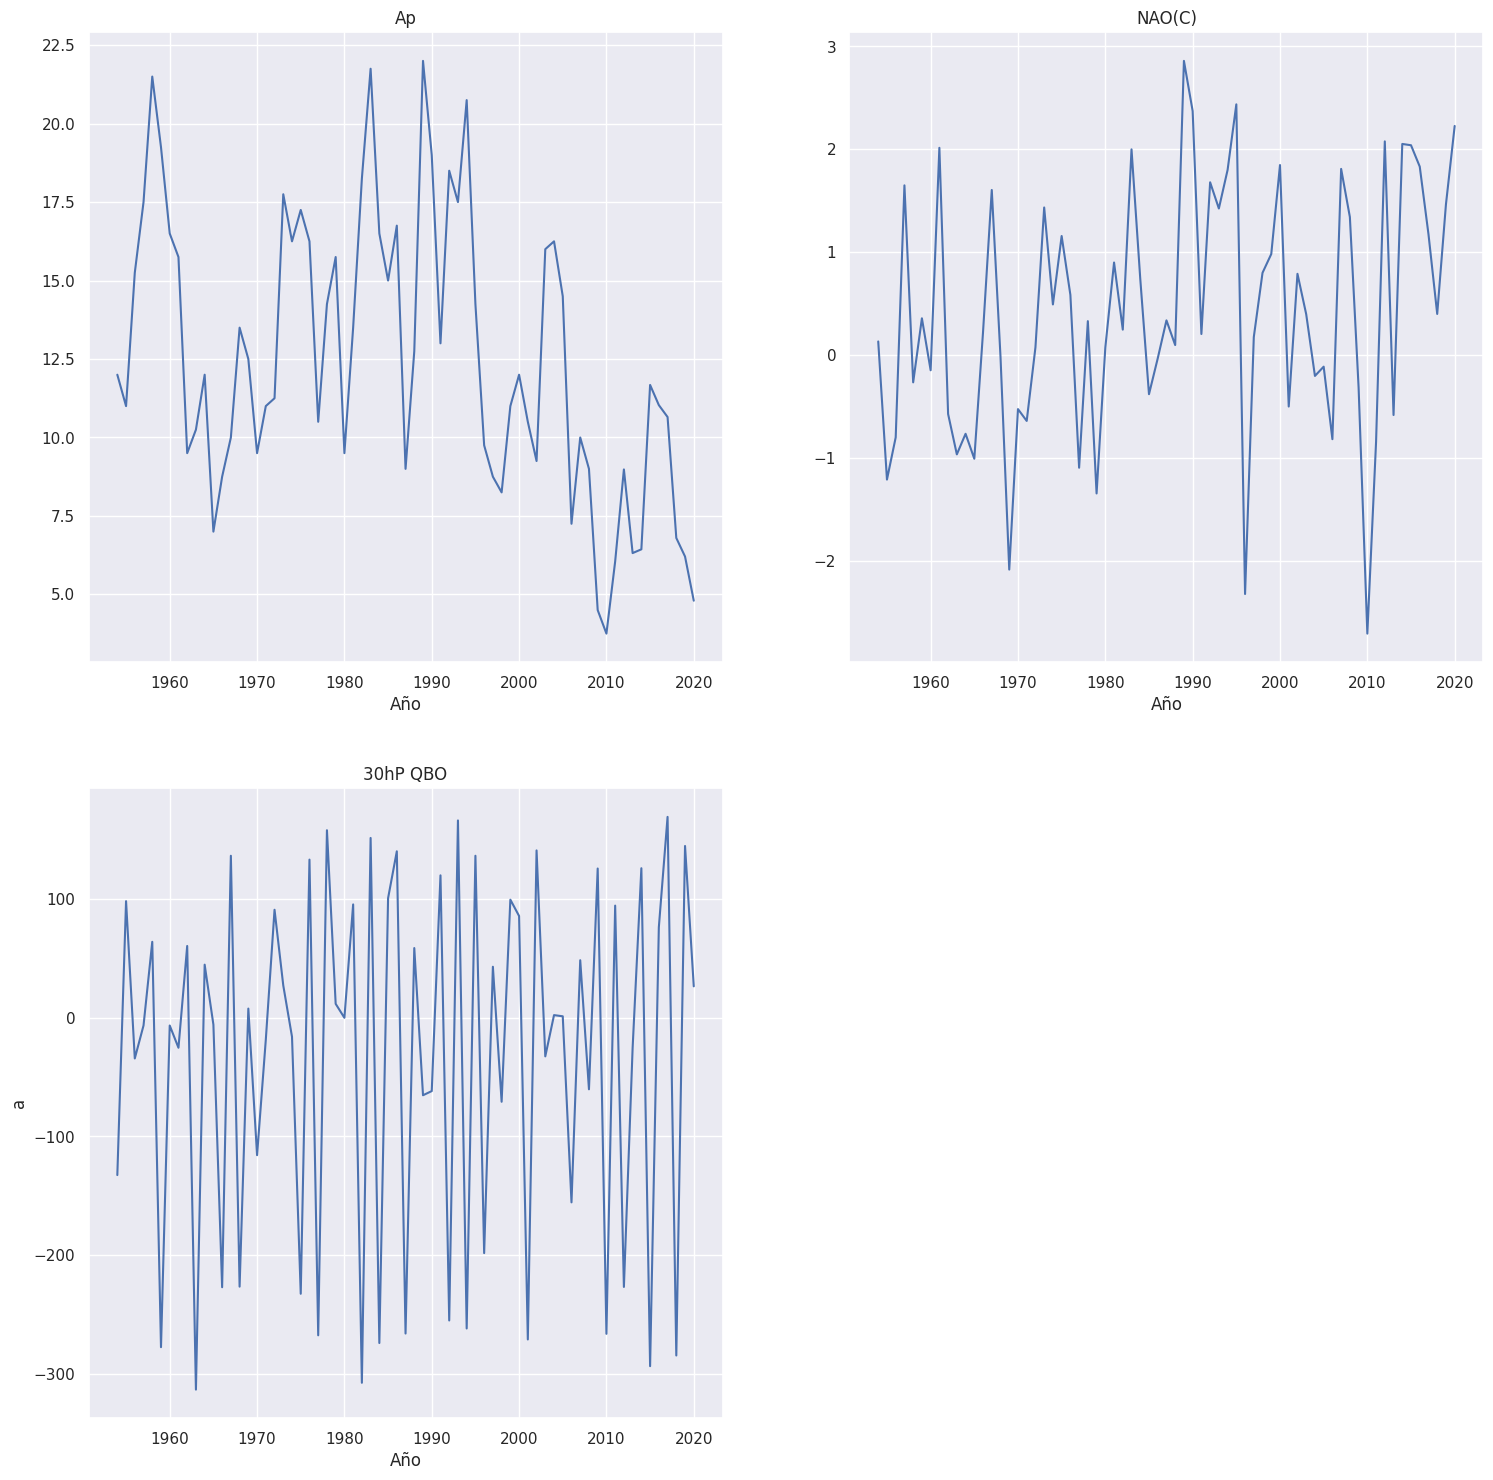

In [ ]:
plt.figure(figsize=(18,18))
plt.subplot(221),plt.plot(invierno["YY"],invierno["Ap"]),plt.title("Ap"),plt.xlabel("Año")
plt.subplot(222),plt.plot(invierno["YY"],invierno["NAO(C)"]),plt.title("NAO(C)"),plt.xlabel("Año")
plt.subplot(223),plt.plot(invierno["YY"],invierno['30hP QBO']),plt.title("30hP QBO"),plt.xlabel("Año"),plt.ylabel("a")
plt.show()

In [ ]:
# En caso de Ap y QBO se ve claramente que son periódicas,
#mientras que la NAO puede tener periodos muy prolongados, de varios años, de fases positivas o negativas

##**Normalización**

La escala absoluta máxima cambia la escala de cada característica entre -1 y 1 dividiendo cada observación por su valor absoluto máximo.

(Necesito que sigan estando los valores positivos y negativos después de normalizar)

In [ ]:
invierno_sin_normalizar = invierno.copy()  #para tener una copia sin normalizar x las dudas

column = ("YY", 'Ap', "30hP QBO", "NAO(C)")

for i in range(0,4):
  invierno[column[i]] = invierno[column[i]] /invierno[column[i]].abs().max()

Visualizo y grafico:

In [ ]:
display(invierno)

,YY,Ap,30hP QBO,NAO(C)
1,0.967327,0.545455,-0.422985,0.046329
2,0.967822,0.500000,0.313647,-0.423077
3,0.968317,0.693182,-0.109338,-0.279720
4,0.968812,0.795455,-0.020750,0.576923
5,0.969307,0.977273,0.204310,-0.092657
...,...,...,...,...
63,0.998020,0.501441,0.243416,0.640734
64,0.998515,0.484172,0.540303,0.410839
65,0.999010,0.309005,-0.908220,0.139860
66,0.999505,0.282101,0.462091,0.512238


In [ ]:
invierno.describe().T        #std:desvío estandar

,count,mean,std,min,25%,50%,75%,max
YY,67.0,0.983663,0.009646,0.967327,0.975495,0.983663,0.991832,1.000000
Ap,67.0,0.569670,0.205514,0.170455,0.426136,0.545455,0.738636,1.000000
30hP QBO,67.0,-0.109314,0.486244,-1.000000,-0.564645,0.000000,0.303272,0.540303
NAO(C),67.0,0.148197,0.427683,-0.946678,-0.153846,0.115385,0.506993,1.000000


<Axes: >

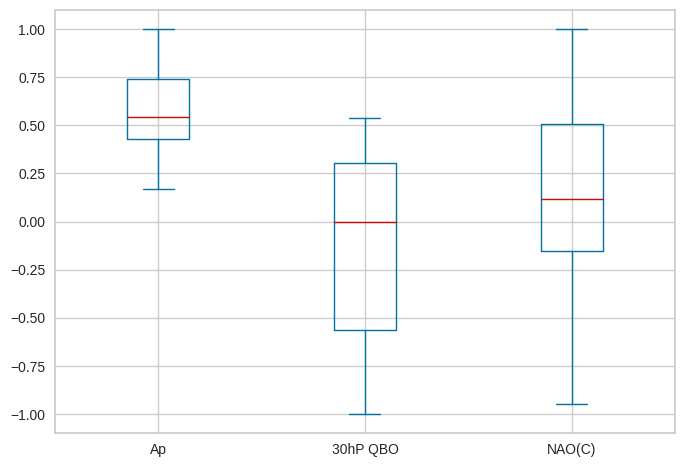

In [ ]:
invierno.drop(columns=["YY"]).plot.box()

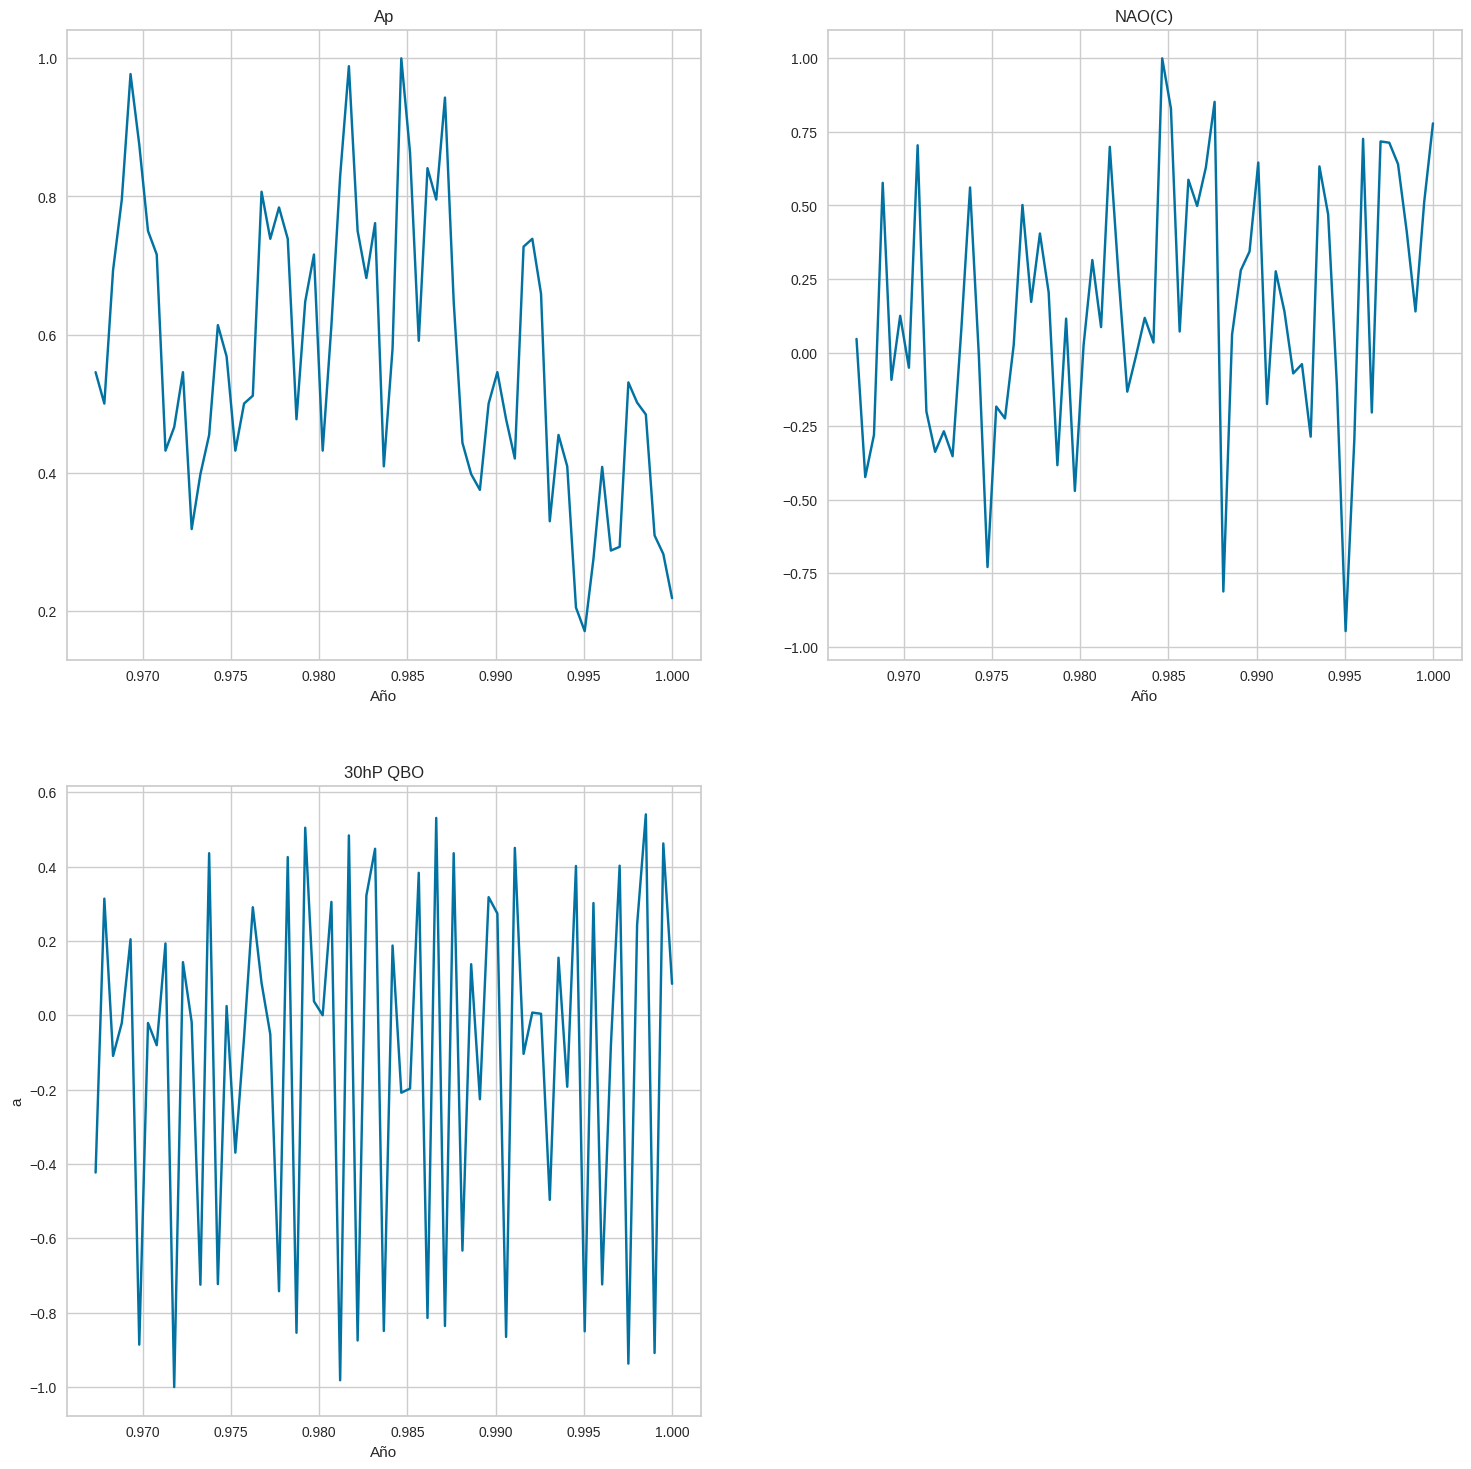

In [ ]:
plt.figure(figsize=(18,18))
plt.subplot(221),plt.plot(invierno["YY"],invierno["Ap"]),plt.title("Ap"),plt.xlabel("Año")
plt.subplot(222),plt.plot(invierno["YY"],invierno["NAO(C)"]),plt.title("NAO(C)"),plt.xlabel("Año")
plt.subplot(223),plt.plot(invierno["YY"],invierno['30hP QBO']),plt.title("30hP QBO"),plt.xlabel("Año"),plt.ylabel("a")
plt.show()

In [ ]:
# Ahora, al estar normalizadas se puede ver que los valores de los parámetros solo varían entre -1 y 1

<Axes: xlabel='Ap', ylabel='NAO(C)'>

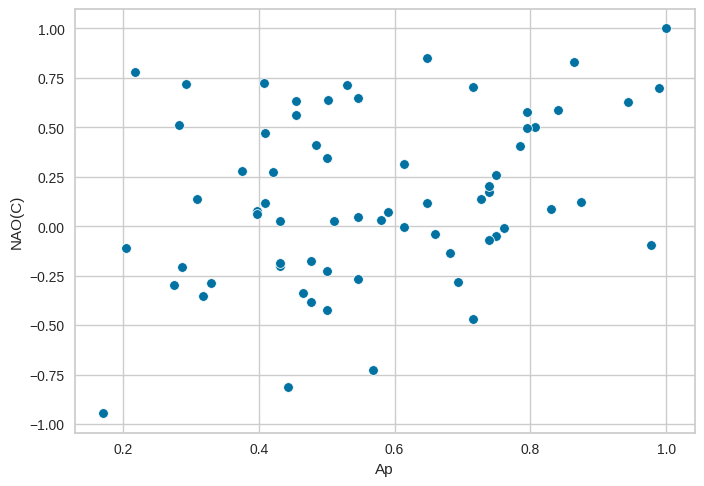

In [ ]:
sns.scatterplot(data=invierno, x="Ap", y="NAO(C)")

In [ ]:
"""
pip install pandas-profiling
"""

'\npip install pandas-profiling\n'

In [ ]:
"""
from pandas_profiling import ProfileReport
import ydata_profiling
from pandas_profiling.utils.cache import cache_file
profile = ProfileReport(invierno, title="Atmósfera Dataset", html={'style': {'full_width': True}}, sort=None)
profile
"""
#Con lo realizado anteriormente, ya no es necesario ejecutar esto pero es muy bueno para dar un pantallazo rápido y general de los datos.

'\nfrom pandas_profiling import ProfileReport\nimport ydata_profiling\nfrom pandas_profiling.utils.cache import cache_file\nprofile = ProfileReport(invierno, title="Atmósfera Dataset", html={\'style\': {\'full_width\': True}}, sort=None)\nprofile\n'

##Correlación

(<Axes: title={'center': 'Matriz de Correlación'}>,
 Text(0.5, 1.0, 'Matriz de Correlación'))

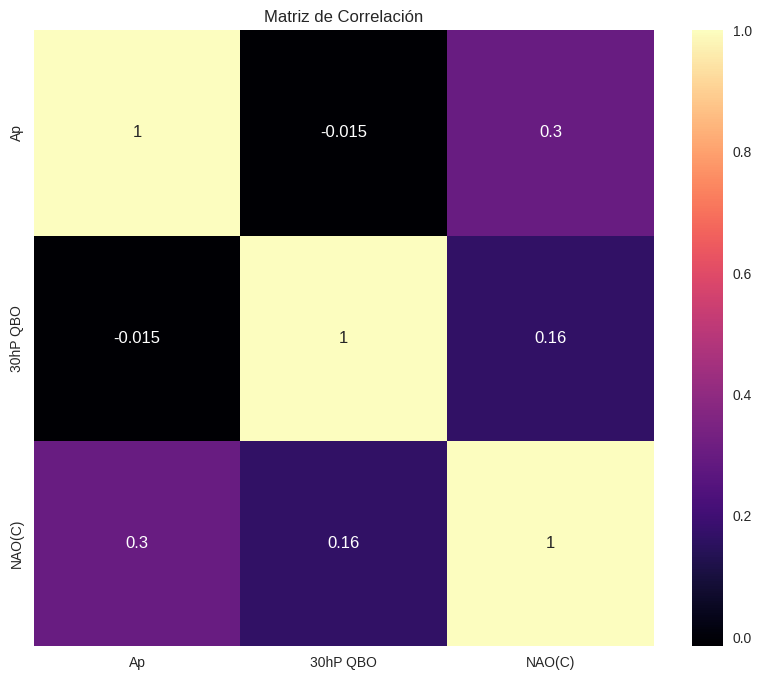

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(invierno.drop(columns=['YY']).corr(), cmap= "magma", annot = True),plt.title("Matriz de Correlación")

In [ ]:
# En realidad lo más importante, y lo único que se va a analizar aquí,
# es la relación (o correlación) entre la actividad geomagnética (Ap) y la NAO
print (invierno.corr()['Ap']["NAO(C)"])

0.301861951164188


In [ ]:
# corr_sig= corr_sig(invierno['Ap'],invierno["NAO(C)"])

# print(corr_sig)

In [ ]:
pip install scipy

In [ ]:
import numpy as np
import scipy.stats as stats

# Datos de las dos series de tiempo
serie1 = invierno['Ap']
serie2 = invierno["NAO(C)"]

# Calcular la correlación de Pearson
correlation_coefficient, _ = stats.pearsonr(serie1, serie2)

# Número de datos (tamaño de la muestra)
n = len(serie1)

# Grados de libertad para la distribución t
degrees_of_freedom = n - 2

# Calcular el estadístico t
t_statistic = correlation_coefficient * np.sqrt((n - 2) / (1 - correlation_coefficient**2))

# Definir un nivel de significancia (por ejemplo, 0.05)
significance_level = 0.05

# Calcular el valor crítico de la distribución t para el nivel de significancia dado y los grados de libertad
critical_t = stats.t.ppf(1 - significance_level / 2, degrees_of_freedom)


print ("correlación:", correlation_coefficient)

# Evaluar la significancia de la correlación
if np.abs(t_statistic) > critical_t:
    print("SIGNIFICATIVA al nivel de significancia de", significance_level)
else:
    print("NO ES SIGNIFICATIVA al nivel de significancia de", significance_level)

print ()

# Muestro lo calculado
print ("estadístico t:", t_statistic)
print ("t crítico:", critical_t)

correlación: 0.30186195116418785
SIGNIFICATIVA al nivel de significancia de 0.05

estadístico t: 2.5527714384104927
t crítico: 1.9971379077520122


***

# **3. Análisis de correlación según fases de la QBO**

El objetivo ahora es ver la correlación entre la act geomagnética y la NAO estratificando según las fases de la QBO. En otras palabras, se estudia cómo es el comportamiento de las asociación act geom-NAO, cuando los vientos de la QBO viajan para el este (fase negativa) y cuando viajan para el oeste (fase positiva).



In [ ]:
#La idea es separar fase positiva y negativa (1:negativa:easterly, 0:positiva:westerly)

invierno_qbo=invierno.copy()

invierno_qbo['fase QBO']= invierno_qbo['30hP QBO'] < 0
fase={False:0, True:1}
invierno_qbo['fase QBO']=invierno_qbo['fase QBO'].map(fase)
invierno_qbo=invierno_qbo.drop(columns=['30hP QBO'])
invierno_qbo

,YY,Ap,NAO(C),fase QBO
1,0.967327,0.545455,0.046329,1
2,0.967822,0.500000,-0.423077,0
3,0.968317,0.693182,-0.279720,1
4,0.968812,0.795455,0.576923,1
5,0.969307,0.977273,-0.092657,0
...,...,...,...,...
63,0.998020,0.501441,0.640734,0
64,0.998515,0.484172,0.410839,0
65,0.999010,0.309005,0.139860,1
66,0.999505,0.282101,0.512238,0


<Axes: xlabel='fase QBO', ylabel='count'>

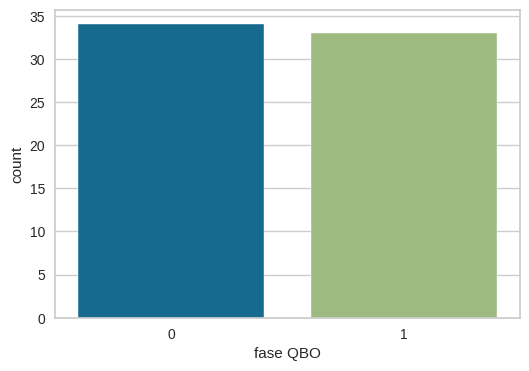

In [ ]:
plt.figure(figsize = (6, 4))
sns.countplot(x = 'fase QBO', data=invierno_qbo)
#veo que el número de ambas fases es parecido

### Correlación

In [ ]:
#genero 2 dataframes, 1 para cada fase        # 1:negativa:easterly, 0:positiva:westerly
invierno_qbo_0=invierno_qbo.loc[invierno_qbo["fase QBO"]==0,:]
invierno_qbo_0=invierno_qbo_0.drop(columns=['fase QBO'])
invierno_qbo_1=invierno_qbo.loc[invierno_qbo["fase QBO"]==1,:]
invierno_qbo_1=invierno_qbo_1.drop(columns=['fase QBO'])

In [ ]:
print (invierno.corr()['Ap']["NAO(C)"])
print (invierno_qbo_0.corr()['Ap']["NAO(C)"])
print (invierno_qbo_1.corr()['Ap']["NAO(C)"])

0.301861951164188
-0.06151005057166335
0.6002694109290705


In [ ]:
# # invierno
# serie1=invierno['Ap']
# serie2= invierno["NAO(C)"]
# corr_sig= corr_sig(invierno['Ap'],invierno["NAO(C)"])

# print(corr_sig)

# # invierno_qbo_0
# serie1=invierno_qbo_0['Ap']
# serie2= invierno_qbo_0["NAO(C)"]
# corr_sig= corr_sig(serie1,serie2)

# print(corr_sig)

# # invierno_qbo_1
# corr_sig= corr_sig(invierno_qbo_1['Ap'],invierno_qbo_1["NAO(C)"])

# print(corr_sig)

In [ ]:
# INVIERNO
serie1 = invierno['Ap']
serie2 = invierno["NAO(C)"]

correlation_coefficient, _ = stats.pearsonr(serie1, serie2)
n = len(serie1)
degrees_of_freedom = n - 2
t_statistic = correlation_coefficient * np.sqrt((n - 2) / (1 - correlation_coefficient**2))
significance_level = 0.05
critical_t = stats.t.ppf(1 - significance_level / 2, degrees_of_freedom)
print ("invierno")
print ("correlación:", correlation_coefficient)
if np.abs(t_statistic) > critical_t:
    print("SIGNIFICATIVA al nivel de significancia de", significance_level)
else:
    print("NO ES SIGNIFICATIVA al nivel de significancia de", significance_level)
print (" ")

# invierno_qbo_0
serie1 = invierno_qbo_0['Ap']
serie2 = invierno_qbo_0["NAO(C)"]

correlation_coefficient, _ = stats.pearsonr(serie1, serie2)
n = len(serie1)
degrees_of_freedom = n - 2
t_statistic = correlation_coefficient * np.sqrt((n - 2) / (1 - correlation_coefficient**2))
significance_level = 0.05
critical_t = stats.t.ppf(1 - significance_level / 2, degrees_of_freedom)
print ("invierno_qbo_0")
print ("correlación:", correlation_coefficient)
if np.abs(t_statistic) > critical_t:
    print("SIGNIFICATIVA al nivel de significancia de", significance_level)
else:
    print("NO ES SIGNIFICATIVA al nivel de significancia de", significance_level)
print (" ")

# invierno_qbo_1
serie1 = invierno_qbo_1['Ap']
serie2 = invierno_qbo_1["NAO(C)"]

correlation_coefficient, _ = stats.pearsonr(serie1, serie2)
n = len(serie1)
degrees_of_freedom = n - 2
t_statistic = correlation_coefficient * np.sqrt((n - 2) / (1 - correlation_coefficient**2))
significance_level = 0.05
critical_t = stats.t.ppf(1 - significance_level / 2, degrees_of_freedom)
print ("invierno_qbo_1")
print ("correlación:", correlation_coefficient)
if np.abs(t_statistic) > critical_t:
    print("SIGNIFICATIVA al nivel de significancia de", significance_level)
else:
    print("NO ES SIGNIFICATIVA al nivel de significancia de", significance_level)
print (" ")

invierno
correlación: 0.30186195116418785
SIGNIFICATIVA al nivel de significancia de 0.05
 
invierno_qbo_0
correlación: -0.06151005057166335
NO ES SIGNIFICATIVA al nivel de significancia de 0.05
 
invierno_qbo_1
correlación: 0.6002694109290705
SIGNIFICATIVA al nivel de significancia de 0.05
 


In [ ]:
#Se observa que la correlación entre la actividad geomagnética y la NAO aumenta considerablemente cuando la QBO está en fase easterly y disminuye, volviéndose negativa e insignificativa en fase westerly

In [ ]:
"""
plt.figure(figsize=(10,8))
sns.heatmap(invierno_qbo_0.drop(columns=['YY']).corr(), cmap= "magma", annot = True),plt.title("Matriz de Correlación")


plt.figure(figsize=(10,8))
sns.heatmap(invierno_qbo_1.drop(columns=['YY']).corr(), cmap= "magma", annot = True),plt.title("Matriz de Correlación")
"""
#Aquí mi idea era mostrar de alguna manera más vistosa estas correlaciones pero no tiene mucho sentido graficar
# 2 matrices de correlación que solamente me de un valor importante

'\nplt.figure(figsize=(10,8))\nsns.heatmap(invierno_qbo_0.drop(columns=[\'YY\']).corr(), cmap= "magma", annot = True),plt.title("Matriz de Correlación")\n\n\nplt.figure(figsize=(10,8))\nsns.heatmap(invierno_qbo_1.drop(columns=[\'YY\']).corr(), cmap= "magma", annot = True),plt.title("Matriz de Correlación")\n'

#**3. Aprendizaje no Supervisado:** Clusterización

El objetivo del Análisis Clúster es obtener grupos de objetos de forma que, por un lado, los objetos pertenecientes a un mismo grupo sean muy semejantes entre sí y, por el otro, los objetos pertenecientes a grupos diferentes tengan un comportamiento distinto con respecto a las variables analizadas.


En este trabajo se investiga cuáles son las clasificaciones propuestas por algoritmos de aprendizaje automático y cómo es la respuesta de la atmósfera a la actividad geomagnética en cada clúster propuesto, a traves del estudio de las correlaciones.

Primero, mediante diferentes métodos, se interroga el número de clusters recomendados para mi dataset (3.0). Luego con esa información, se utilizan los algoritmos de clustering: K-Means (3.1), MeanShift (3.2) y DBSCAN (3.3) para los datos y se estudiarán las correlaciones para cada cluster.

## 3.0. Número de clusters recomendados

#### Método del codo (distortion, inertia)

In [ ]:
# Librerías para Clustering
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import seaborn as sns

In [ ]:
X=invierno.drop(columns=['YY'])

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)

    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

1 : 0.6292419973453891
2 : 0.4689954647702163
3 : 0.37736145288368333
4 : 0.3429700575274251
5 : 0.3174912171614979
6 : 0.29114446753377476
7 : 0.27284593158865555
8 : 0.2507378064091537
9 : 0.24267692830150628
1 : 30.464433383751434
2 : 17.50024011895616
3 : 11.724294892554878
4 : 8.928009689694163
5 : 7.57664090506459
6 : 6.535231937534888
7 : 5.815795581745233
8 : 4.994686075508357
9 : 4.522218077188807


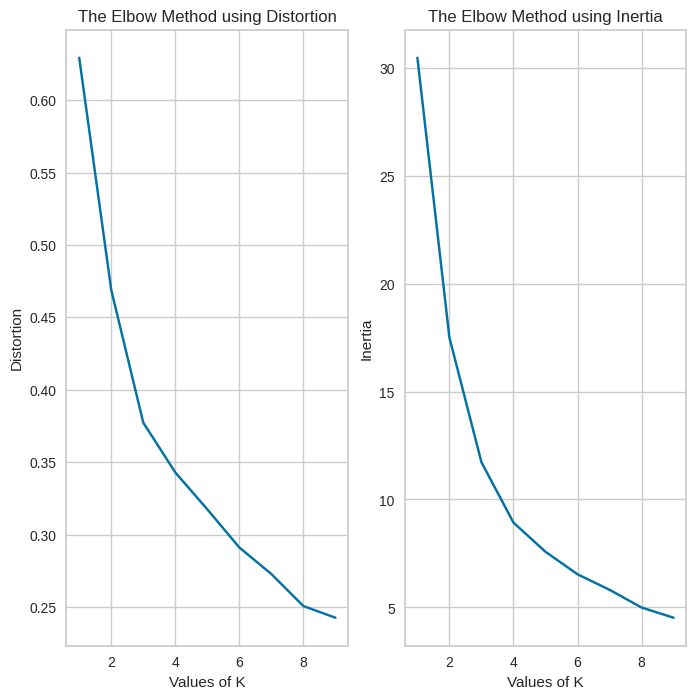

In [ ]:
#DISTORCIÓN
for key, val in mapping1.items():
    print(f'{key} : {val}')
#INERCIA
for key, val in mapping2.items():
    print(f'{key} : {val}')

plt.figure(figsize=(8,8))
plt.subplot(121), plt.plot(K, distortions, 'bx-'), plt.xlabel('Values of K'), plt.ylabel('Distortion'), plt.title('The Elbow Method using Distortion')
plt.subplot(122), plt.plot(K, inertias, 'bx-'), plt.xlabel('Values of K'), plt.ylabel('Inertia'), plt.title('The Elbow Method using Inertia')
plt.show()

La mayor torsión en la curva se encuentra en K=2, es decir que el método del codo recomienda 2 clusters, aunque se podría intentar con 3 también.

#### Método de la silueta

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



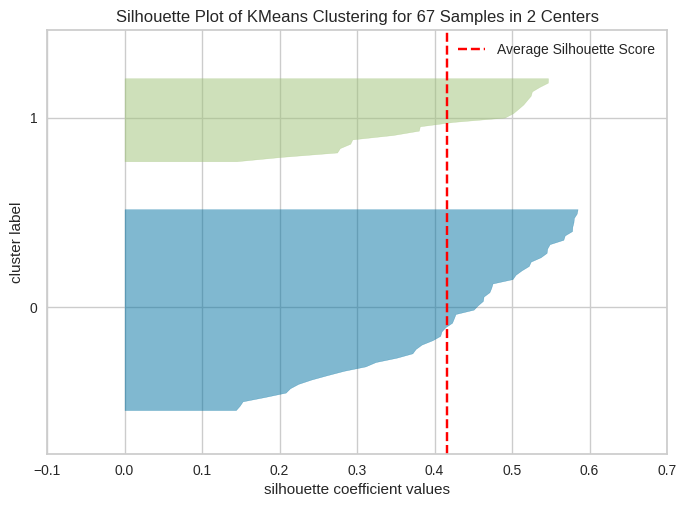

Para n_clusters = 2 El promedio de silhouette_score es : 0.41653901373902225


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



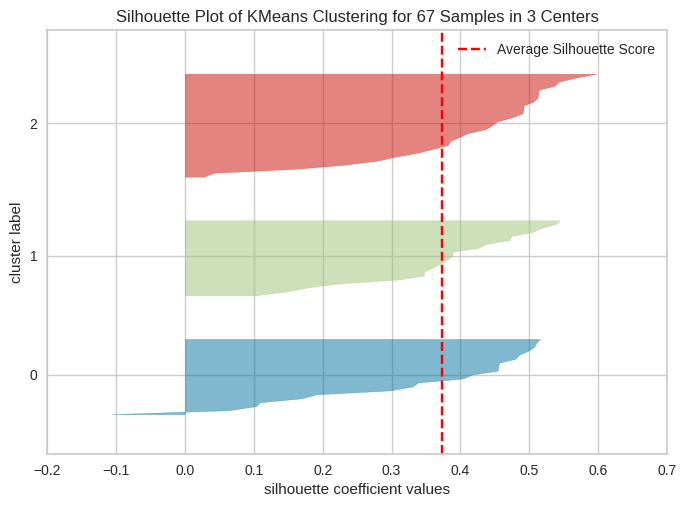

Para n_clusters = 3 El promedio de silhouette_score es : 0.3732483143272783


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



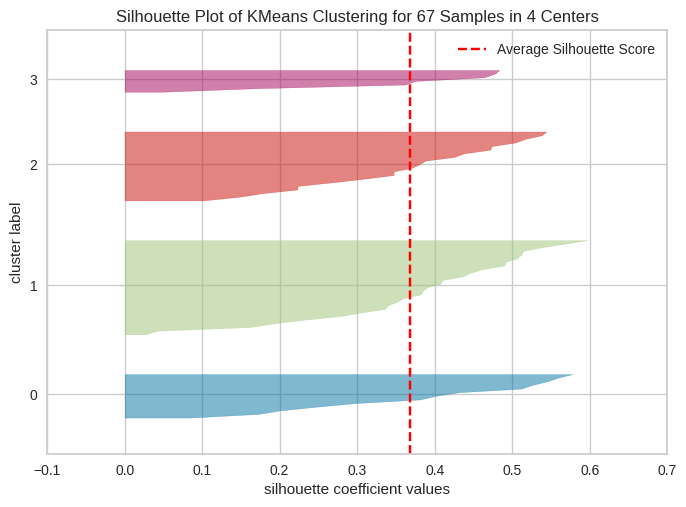

Para n_clusters = 4 El promedio de silhouette_score es : 0.36807904334316105


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



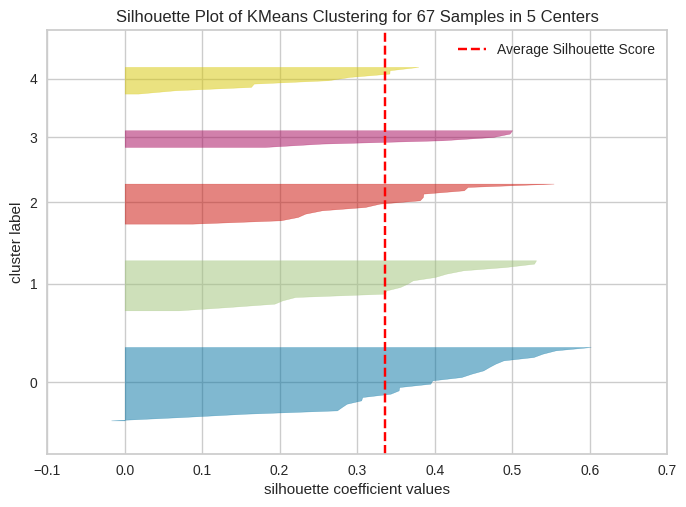

Para n_clusters = 5 El promedio de silhouette_score es : 0.3353183498826765


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



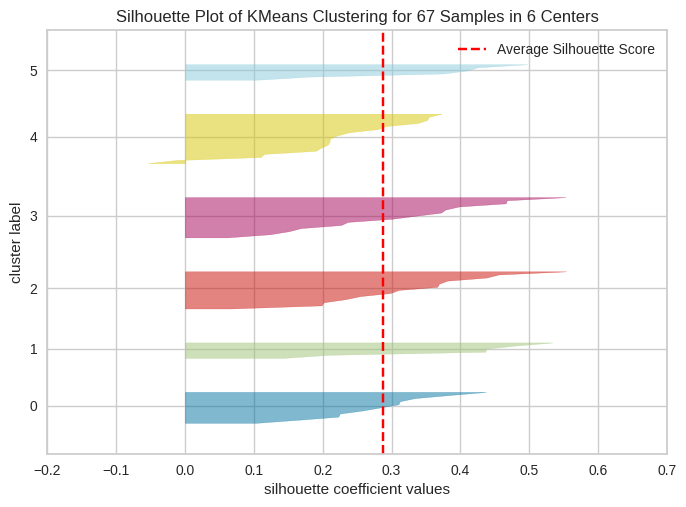

Para n_clusters = 6 El promedio de silhouette_score es : 0.2872545814885014


In [ ]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
  clusterer = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
  cluster_labels = clusterer.fit_predict(X)

  visualizer = SilhouetteVisualizer(clusterer, colors='yellowbrick')
  visualizer.fit(X)        # Fit the data to the visualizer
  visualizer.show()

  silhouette_avg = silhouette_score(X, cluster_labels)
  print("Para n_clusters =", n_clusters, "El promedio de silhouette_score es :", silhouette_avg)



El análisis de la silueta proporciona la calidad del agrupamiento o clustering: Mide la distancia de separación entre los clusters y nos indica como de cerca está cada punto de un clúster a puntos de los clústers vecinos. Un valor alto indica un buen clustering. Los coeficientes de silueta cercanos a +1 indican que la observación se encuentra lejos de los clústers vecinos.

El número óptimo de clústers n es aquel que maximiza la media de los coeficientes de silueta para un rango de valores de n.

En este caso resulta ser n=2 el que tiene mejor media de coeficiente, con valor 0.416. En la figura se puede ver que la división en 2 se produce de tal manera que uno de los grupos es más grande que el otro.

También se puede observar que a medida que se aumenta el número de clusters, más disminuye la media del coefiente de la silueta.

###Dendograma

/content


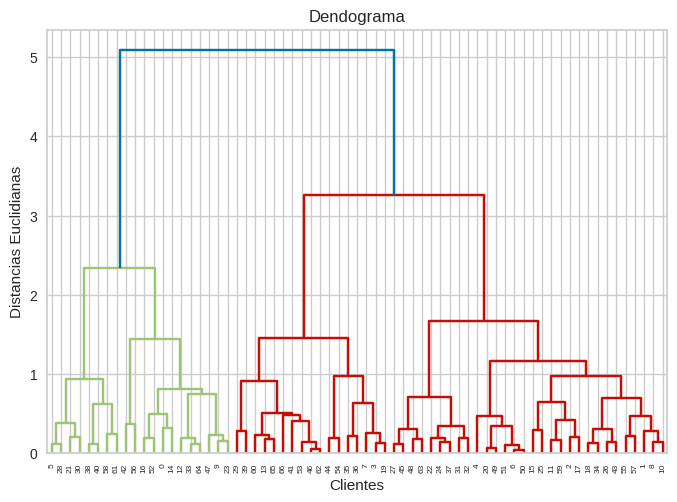

In [ ]:
# import csv
import os
print(os.getcwd())

# Creamos el dendograma para encontrar el número óptimo de clusters

import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))

# en method pueden ser 'ward', 'average', 'complete', 'single'

plt.title('Dendograma')
plt.xlabel('Clientes')
plt.ylabel('Distancias Euclidianas')
plt.show()

El número de clusters depende del sitio donde cortemos el dendograma, por lo tanto la decisión sobre el número óptimo de clusters es subjetiva. Es conveniente elegir un número de clusters que sepamos interpretar. Para interpretar los clúster podemos utilizar: ANOVA, Análisis factorial, Análisis discriminante, e incluso aentido común.

Para decidir el número de clusters nos puede ser de gran utilidad representar los distintos pasos del algoritmo y las distancias a la que se produce la fusión de los clusters. En los primeros pasos el salto de las distancias es pequeño, mientras que esas diferencias van aumentando en los sucesivos pasos. Podemos elegir como punto de corte aquel donde comienzan a producirse saltos más bruscos. En nuestro ejemplo, el salto brusco se produce entre etapas 3 y 4, por lo tanto son dos el número de clusters óptimo.

https://wpd.ugr.es/~bioestad/guia-spss/practica-8/



## 3.1. K-Means

Se comienza con los algoritmos de Clustering. Como se vió anteriormente, el número de Cluster recomendado es 2.

###n_Clusters = 2

In [ ]:
num_clusters = 2                                #  Puedo cambiar rápidamente el número de clusters desde aquí
kmeans = KMeans(n_clusters=num_clusters).fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
# Ahora vamos a crear un nuevo dataframe que tenga los mismos datos que el original, y que agregue una ultima columna con los clusters de cada pixel
invierno_clusterskm2=invierno.copy()
# invierno_clusterskm2.head()
invierno_clusterskm2['clusters_km3']=kmeans.labels_
invierno_clusterskm2.head(10)
# kmeans.labels_    #con esto puedo ver las etiquetas

,YY,Ap,30hP QBO,NAO(C),clusters_km3
1,0.967327,0.545455,-0.422985,0.046329,1
2,0.967822,0.500000,0.313647,-0.423077,0
3,0.968317,0.693182,-0.109338,-0.279720,0
4,0.968812,0.795455,-0.020750,0.576923,0
5,0.969307,0.977273,0.204310,-0.092657,0
6,0.969802,0.875000,-0.885874,0.125000,1
7,0.970297,0.750000,-0.020750,-0.051573,0
8,0.970792,0.715909,-0.080607,0.704545,0
9,0.971287,0.431818,0.193136,-0.200175,0
10,0.971782,0.465909,-1.000000,-0.337413,1


In [ ]:
#Quiero ver los centroides
centroids = kmeans.cluster_centers_
print(centroids)

[[ 0.57735915  0.1737617   0.1945395 ]
 [ 0.55159934 -0.7745411   0.03929196]]


In [ ]:
#Este no funciona         #ya ni me acuerdo que quise hacer aquí
# pd.crosstab(index=invierno.target,
#             columns=invierno_clusterskm3['clusters_km'])#, margins=True)

 Visualizo la clusterización

Mi idea es ver en 3D graficados mis 3 parámetros (QBO, NAO, Ap) para intentar entender cómo estan distribuidos los 2 grupos o clusters.

In [ ]:
import plotly as py
import plotly.graph_objs as go

trace1 = go.Scatter3d(
    x= invierno['Ap'],
    y= invierno['NAO(C)'],
    z= invierno['30hP QBO'],
    mode='markers',
     marker=dict(
        color = kmeans.labels_,
        size= 10,
        line=dict(
            #  color = invierno['Ap'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
    # title= 'Jugando',
    scene = dict(
            xaxis = dict(title  = 'Ap'),
            yaxis = dict(title  = 'NAO'),
            zaxis = dict(title  = 'QBO')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

In [ ]:
#intento graficar los los crentroides y no puedo :(
# """
# num_clusters = 3                                        #  Puedo cambiar rápidamente el número de clusters desde aquí
# kmeans = KMeans(n_clusters=num_clusters).fit(X)

# colors = ['red', 'blue', 'purple', "Green","Orange"]

# plt.figure(figsize=(16,6))
# sns.scatterplot(data=invierno, x="Ap", y="30hP QBO" , hue=kmeans.labels_, palette="viridis" , alpha=0.5)
# # ax = sns.scatterplot(invierno[:, 0], invierno[:,1], hue=kmeans.labels_, palette=colors, alpha=0.5)
# # ax = sns.scatterplot(data=invierno, x="Ap", y="30hP QBO" , hue=kmeans.labels_, palette="viridis", alpha=0.5)
# #no me sale graficar los centroides

# ax = sns.scatterplot(data=centros, x=centros[0][1], y=centros[0][2] ,hue=range(num_clusters), palette=colors, s=80, ec='black', legend=False, ax=ax) #intento pero no me sale graficar los centroides
# # ax = sns.scatterplot(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],hue=range(num_clusters), palette=colors, s=80, ec='black', legend=False, ax=ax) #intento pero no me sale graficar los centroides
# # ax = sns.scatterplot(kmeans.cluster_centers_[:, 0], hue=range(num_clusters), palette=colors, s=80, ec='black', legend=False, ax=ax)
# # ax.set(xlabel = "Ap", ylabel = "NAO(C)")
# # sns.set(rc={"figure.figsize":(15, 7)}) #ancho=15, #alto= 7
# plt.show()
# """

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



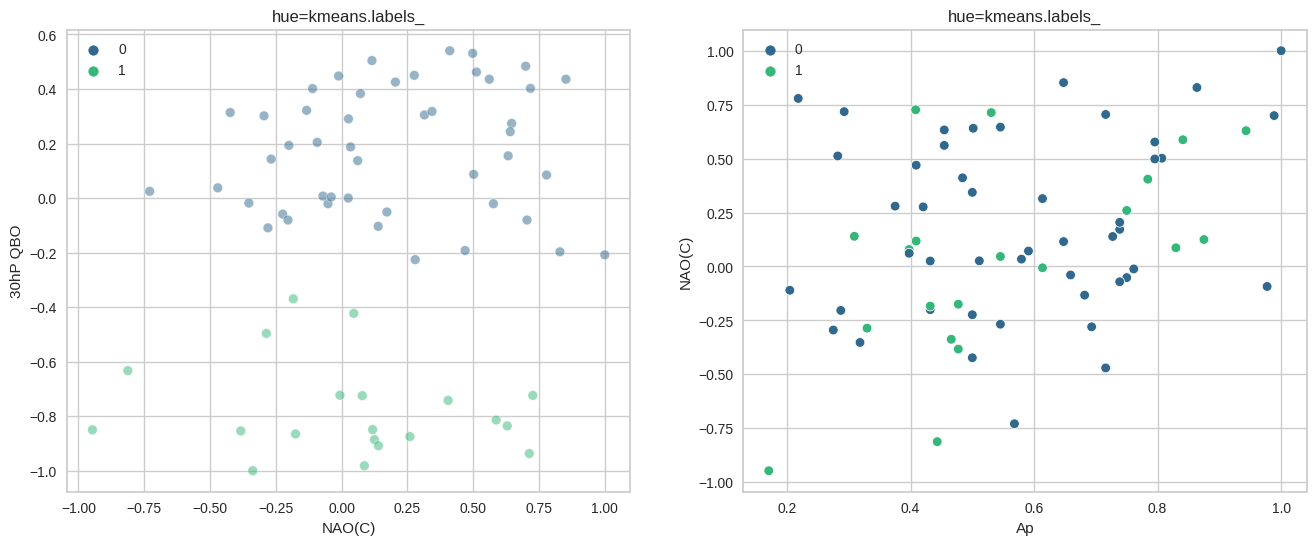

In [ ]:
num_clusters = 2                                        #  Esto no hace falta pero puedo cambiar rápidamente el número de clusters desde aquí
kmeans = KMeans(n_clusters=num_clusters).fit(X)

plt.figure(figsize=(16,6))
plt.subplot(121),  sns.scatterplot(data=invierno, x="NAO(C)", y="30hP QBO" , hue=kmeans.labels_, palette="viridis" , alpha=0.5), plt.title('hue=kmeans.labels_')
plt.subplot(122), sns.scatterplot(data=invierno, x="Ap",  y="NAO(C)",palette="viridis", hue=kmeans.labels_), plt.title('hue=kmeans.labels_')
plt.show()

Al visualizarla me di cuenta que en realidad la clusteriza según la intensidad de vientos de la QBO.
Los grupos se dividen en vientos QBO mayores y menores a -0,2258.
En el estudio de mi tesis se realizaba el análisis separando justamente los vientos de la QBO en 2 grupos (positivos y negativos) para estudiar la respuesta de la NAO ante la actividad geomagnética.

Es interesante que de todos los parámetros que hay ('Ap', '30hP QBO', 'NAO(C)'), el método elija la QBO!!!

Incluso hice el mismo estudio teniendo en cuenta la Temperatura y los vientos del vortice polar:'T-60-90-20','U-60-90-20', obteniendo los mismos resultados.

####Correlación

Busco la correlación de los parámetros ya con la clusterización

In [ ]:
#genero 2 dataframes, 1 para cada cluster
invierno_km2_0=invierno_clusterskm2.loc[invierno_clusterskm2["clusters_km3"]==0,:]
invierno_km2_1=invierno_clusterskm2.loc[invierno_clusterskm2["clusters_km3"]==1,:]

In [ ]:
print (invierno.corr()['Ap']["NAO(C)"])
print (invierno_km2_0.corr()['Ap']["NAO(C)"])
print (invierno_km2_1.corr()['Ap']["NAO(C)"])

0.301861951164188
0.16872532514192531
0.5588373832678667


In [ ]:
# INVIERNO
serie1 = invierno['Ap']
serie2 = invierno["NAO(C)"]

correlation_coefficient, _ = stats.pearsonr(serie1, serie2)
n = len(serie1)
degrees_of_freedom = n - 2
t_statistic = correlation_coefficient * np.sqrt((n - 2) / (1 - correlation_coefficient**2))
significance_level = 0.05
critical_t = stats.t.ppf(1 - significance_level / 2, degrees_of_freedom)
print ("invierno")
print ("correlación:", correlation_coefficient)
if np.abs(t_statistic) > critical_t:
    print("SIGNIFICATIVA al nivel de significancia de", significance_level)
else:
    print("NO ES SIGNIFICATIVA al nivel de significancia de", significance_level)
print (" ")

#invierno_km2_0
serie1 = invierno_km2_0['Ap']
serie2 = invierno_km2_0["NAO(C)"]

correlation_coefficient, _ = stats.pearsonr(serie1, serie2)
n = len(serie1)
degrees_of_freedom = n - 2
t_statistic = correlation_coefficient * np.sqrt((n - 2) / (1 - correlation_coefficient**2))
significance_level = 0.05
critical_t = stats.t.ppf(1 - significance_level / 2, degrees_of_freedom)
print ("invierno_km2_0")
print ("correlación:", correlation_coefficient)
if np.abs(t_statistic) > critical_t:
    print("SIGNIFICATIVA al nivel de significancia de", significance_level)
else:
    print("NO ES SIGNIFICATIVA al nivel de significancia de", significance_level)
print (" ")

#invierno_km2_1
serie1 = invierno_km2_1['Ap']
serie2 = invierno_km2_1["NAO(C)"]

correlation_coefficient, _ = stats.pearsonr(serie1, serie2)
n = len(serie1)
degrees_of_freedom = n - 2
t_statistic = correlation_coefficient * np.sqrt((n - 2) / (1 - correlation_coefficient**2))
significance_level = 0.05
critical_t = stats.t.ppf(1 - significance_level / 2, degrees_of_freedom)
print ("invierno_km2_1")
print ("correlación:", correlation_coefficient)
if np.abs(t_statistic) > critical_t:
    print("SIGNIFICATIVA al nivel de significancia de", significance_level)
else:
    print("NO ES SIGNIFICATIVA al nivel de significancia de", significance_level)
print (" ")


invierno
correlación: 0.30186195116418785
SIGNIFICATIVA al nivel de significancia de 0.05
 
invierno_km2_0
correlación: 0.16872532514192548
NO ES SIGNIFICATIVA al nivel de significancia de 0.05
 
invierno_km2_1
correlación: 0.5588373832678666
SIGNIFICATIVA al nivel de significancia de 0.05
 


La correlación entre la NAO y Ap aumenta en el "cluster 0", es decir, cuando QBO toma los valores más pequeños, mientras que disminuye con QBO los valores más grandes "cluster 1".

###n_Clusters = 3

Al ser el Cluster con n=2 tan similar a lo antes estudiado, investigo si el método "cambia de criterio" cuando se le piden 3 clusters.

In [ ]:
num_clusters = 3                                #  Puedo cambiar rápidamente el número de clusters desde aquí
kmeans = KMeans(n_clusters=num_clusters).fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
# Ahora vamos a crear un nuevo dataframe que tenga los mismos datos que el original, y que agregue una ultima columna con los clusters de cada pixel
invierno_clusterskm3=invierno.copy()
# invierno_clusterskm3.head()
invierno_clusterskm3['clusters_km3']=kmeans.labels_
invierno_clusterskm3.head(10)
# kmeans.labels_    #con esto puedo ver las etiquetas

,YY,Ap,30hP QBO,NAO(C),clusters_km3
1,0.967327,0.545455,-0.422985,0.046329,1
2,0.967822,0.500000,0.313647,-0.423077,0
3,0.968317,0.693182,-0.109338,-0.279720,0
4,0.968812,0.795455,-0.020750,0.576923,2
5,0.969307,0.977273,0.204310,-0.092657,0
6,0.969802,0.875000,-0.885874,0.125000,1
7,0.970297,0.750000,-0.020750,-0.051573,0
8,0.970792,0.715909,-0.080607,0.704545,2
9,0.971287,0.431818,0.193136,-0.200175,0
10,0.971782,0.465909,-1.000000,-0.337413,1


In [ ]:
#Quiero ver los centroides
centroids = kmeans.cluster_centers_
print(centroids)

[[ 0.5683748   0.13552659 -0.10457135]
 [ 0.55159934 -0.7745411   0.03929196]
 [ 0.58948803  0.22537909  0.59833916]]


In [ ]:
import plotly as py
import plotly.graph_objs as go

trace1 = go.Scatter3d(
    x= invierno['Ap'],
    y= invierno['NAO(C)'],
    z= invierno['30hP QBO'],
    mode='markers',
     marker=dict(
        color = kmeans.labels_,
        size= 10,
        line=dict(
            #  color = invierno['Ap'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
    # title= 'Jugando',
    scene = dict(
            xaxis = dict(title  = 'Ap'),
            yaxis = dict(title  = 'NAO'),
            zaxis = dict(title  = 'QBO')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

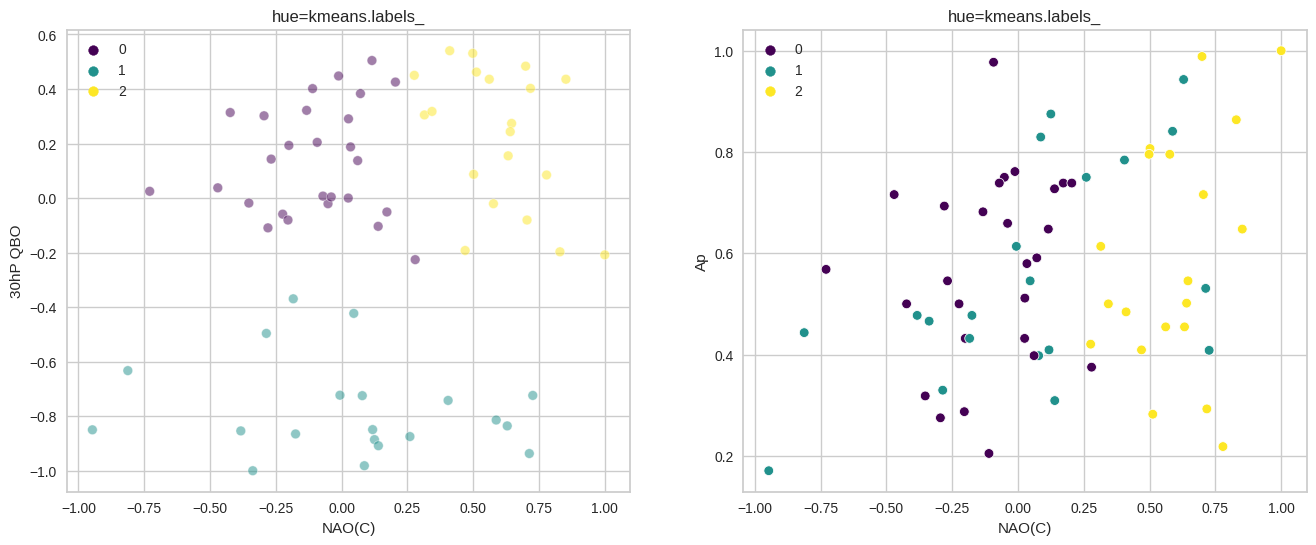

In [ ]:
plt.figure(figsize=(16,6))
plt.subplot(121),  sns.scatterplot(data=invierno, x="NAO(C)", y="30hP QBO" , hue=kmeans.labels_, palette="viridis" , alpha=0.5), plt.title('hue=kmeans.labels_')
plt.subplot(122), sns.scatterplot(data=invierno, x="NAO(C)",  y="Ap",palette="viridis", hue=kmeans.labels_), plt.title('hue=kmeans.labels_')
plt.show()

Cuando el número de clusters que pedimos es 3, el método separa en grupos:
* valores menores a -0.22 de QBO,
* valores mayores a -0,22 de la QBO y mayores de 0.17 de la NAO
* valores mayores a -0,22 de la QBO y menores de 0.17 de la NAO

####Correlación

In [ ]:
#genero 3 dataframes, 1 para cada cluster
invierno_km3_0=invierno_clusterskm3.loc[invierno_clusterskm3["clusters_km3"]==0,:]
invierno_km3_1=invierno_clusterskm3.loc[invierno_clusterskm3["clusters_km3"]==1,:]
invierno_km3_2=invierno_clusterskm3.loc[invierno_clusterskm3["clusters_km3"]==2,:]

In [ ]:
print (invierno.corr()['Ap']["NAO(C)"])
print (invierno_km3_0.corr()['Ap']["NAO(C)"])
print (invierno_km3_1.corr()['Ap']["NAO(C)"])
print (invierno_km3_2.corr()['Ap']["NAO(C)"])

0.301861951164188
0.17477369158024353
0.5588373832678667
0.34191024236633866


In [ ]:
# INVIERNO
serie1 = invierno['Ap']
serie2 = invierno["NAO(C)"]

correlation_coefficient, _ = stats.pearsonr(serie1, serie2)
n = len(serie1)
degrees_of_freedom = n - 2
t_statistic = correlation_coefficient * np.sqrt((n - 2) / (1 - correlation_coefficient**2))
significance_level = 0.05
critical_t = stats.t.ppf(1 - significance_level / 2, degrees_of_freedom)
print ("correlación:", correlation_coefficient)
if np.abs(t_statistic) > critical_t:
    print("SIGNIFICATIVA al nivel de significancia de", significance_level)
else:
    print("NO ES SIGNIFICATIVA al nivel de significancia de", significance_level)
print (" ")


#invierno_km3_0
serie1 = invierno_km3_0['Ap']
serie2 = invierno_km3_0["NAO(C)"]

correlation_coefficient, _ = stats.pearsonr(serie1, serie2)
n = len(serie1)
degrees_of_freedom = n - 2
t_statistic = correlation_coefficient * np.sqrt((n - 2) / (1 - correlation_coefficient**2))
significance_level = 0.05
critical_t = stats.t.ppf(1 - significance_level / 2, degrees_of_freedom)
print ("correlación:", correlation_coefficient)
if np.abs(t_statistic) > critical_t:
    print("SIGNIFICATIVA al nivel de significancia de", significance_level)
else:
    print("NO ES SIGNIFICATIVA al nivel de significancia de", significance_level)
print (" ")

#invierno_km3_1
serie1 = invierno_km3_1['Ap']
serie2 = invierno_km3_1["NAO(C)"]

correlation_coefficient, _ = stats.pearsonr(serie1, serie2)
n = len(serie1)
degrees_of_freedom = n - 2
t_statistic = correlation_coefficient * np.sqrt((n - 2) / (1 - correlation_coefficient**2))
significance_level = 0.05
critical_t = stats.t.ppf(1 - significance_level / 2, degrees_of_freedom)
print ("correlación:", correlation_coefficient)
if np.abs(t_statistic) > critical_t:
    print("SIGNIFICATIVA al nivel de significancia de", significance_level)
else:
    print("NO ES SIGNIFICATIVA al nivel de significancia de", significance_level)
print (" ")


#invierno_km3_2
serie1 = invierno_km3_2['Ap']
serie2 = invierno_km3_2["NAO(C)"]

correlation_coefficient, _ = stats.pearsonr(serie1, serie2)
n = len(serie1)
degrees_of_freedom = n - 2
t_statistic = correlation_coefficient * np.sqrt((n - 2) / (1 - correlation_coefficient**2))
significance_level = 0.05
critical_t = stats.t.ppf(1 - significance_level / 2, degrees_of_freedom)
print ("correlación:", correlation_coefficient)
if np.abs(t_statistic) > critical_t:
    print("SIGNIFICATIVA al nivel de significancia de", significance_level)
else:
    print("NO ES SIGNIFICATIVA al nivel de significancia de", significance_level)
print (" ")


correlación: 0.30186195116418785
SIGNIFICATIVA al nivel de significancia de 0.05
 
correlación: 0.1747736915802433
NO ES SIGNIFICATIVA al nivel de significancia de 0.05
 
correlación: 0.5588373832678666
SIGNIFICATIVA al nivel de significancia de 0.05
 
correlación: 0.3419102423663386
NO ES SIGNIFICATIVA al nivel de significancia de 0.05
 


Se puede notar, en comparación a lo anterior, que ahora las correlaciones son todas positivas. Una asociación es más significativa, para valores menores a -0.22 de QBO, mientras que en los otros casos es menor pero diferente al valor de -0.06 que si se consideraran todos los valores mayores a -0,22 de la QBO.

## 3.2. MeanShift

Con este nuevo algoritmo busco primero un valor de "bandwidth" para el cual se generen 2 clusters.

In [ ]:
from sklearn.cluster import estimate_bandwidth
bw=estimate_bandwidth(X,quantile=0.3)
print(bw)

0.6403948461922433


In [ ]:
from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition
ms = MeanShift(bandwidth=0.64, bin_seeding=False) #bin_seeding=True usa versión discretizada de los puntos en una
# cuadrícula que tiene que ver con el ancho de banda, agiliza el algoritmo
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

# print("Cantidad de clusters encontrados por Mean Shift : %d" % n_clusters_)
# print('cantidad de datos por cluster: ', Counter(ms.labels_))

invierno_clusters_MS=invierno.copy()
# invierno_clusterskm3.head()
invierno_clusters_MS['clusters_MS']=ms.labels_

invierno_clusters_MS['clusters_MS'].value_counts()

0    45
1    22
Name: clusters_MS, dtype: int64

In [ ]:
invierno_clusters_MS.head(10)

,YY,Ap,30hP QBO,NAO(C),clusters_MS
1,0.967327,0.545455,-0.422985,0.046329,1
2,0.967822,0.500000,0.313647,-0.423077,0
3,0.968317,0.693182,-0.109338,-0.279720,0
4,0.968812,0.795455,-0.020750,0.576923,0
5,0.969307,0.977273,0.204310,-0.092657,0
6,0.969802,0.875000,-0.885874,0.125000,1
7,0.970297,0.750000,-0.020750,-0.051573,0
8,0.970792,0.715909,-0.080607,0.704545,0
9,0.971287,0.431818,0.193136,-0.200175,0
10,0.971782,0.465909,-1.000000,-0.337413,1


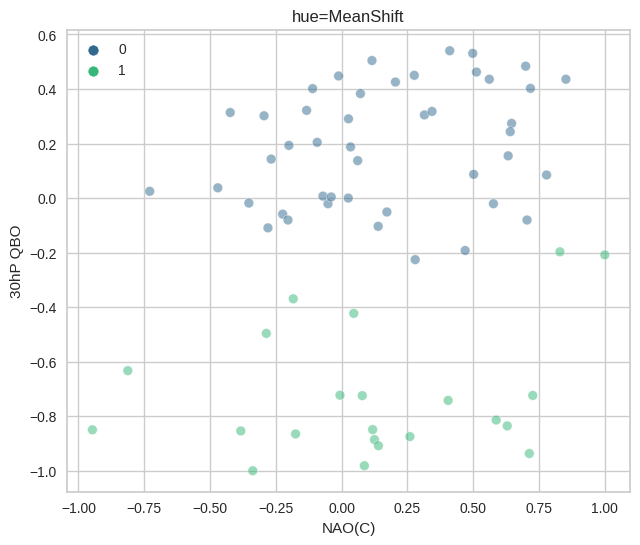

In [ ]:
plt.figure(figsize=(16,6))
plt.subplot(121),  sns.scatterplot(data=invierno, x="NAO(C)", y="30hP QBO" , hue=ms.labels_, palette="viridis" , alpha=0.5), plt.title('hue=MeanShift')
# plt.subplot(122), sns.scatterplot(data=invierno, x="Ap",  y="T-60-90-20",palette="viridis", hue="30hP QBO"), plt.title('hue=MeanShift')
plt.show()


En este caso también se clusteriza según la QBO!!!
Pero con algunas diferencias en un par de puntos, cuando QBO es cercana a -0.2 y la NAO es muy: alta

### Correlación

In [ ]:
#genero 2 dataframes, 1 para cada cluster
invierno_MS_0=invierno_clusters_MS.loc[invierno_clusters_MS["clusters_MS"]==0,:]
invierno_MS_1=invierno_clusters_MS.loc[invierno_clusters_MS["clusters_MS"]==1,:]

In [ ]:
print (invierno.corr()['Ap']["NAO(C)"])
print (invierno_MS_0.corr()['Ap']["NAO(C)"])
print (invierno_MS_1.corr()['Ap']["NAO(C)"])

0.301861951164188
0.030910408304889867
0.6671485610975169


In [ ]:
# INVIERNO
serie1 = invierno['Ap']
serie2 = invierno["NAO(C)"]

correlation_coefficient, _ = stats.pearsonr(serie1, serie2)
n = len(serie1)
degrees_of_freedom = n - 2
t_statistic = correlation_coefficient * np.sqrt((n - 2) / (1 - correlation_coefficient**2))
significance_level = 0.05
critical_t = stats.t.ppf(1 - significance_level / 2, degrees_of_freedom)
print ("invierno")
print ("correlación:", correlation_coefficient)
if np.abs(t_statistic) > critical_t:
    print("SIGNIFICATIVA al nivel de significancia de", significance_level)
else:
    print("NO ES SIGNIFICATIVA al nivel de significancia de", significance_level)
print (" ")


#invierno_MS_0
serie1 = invierno_MS_0['Ap']
serie2 = invierno_MS_0["NAO(C)"]

correlation_coefficient, _ = stats.pearsonr(serie1, serie2)
n = len(serie1)
degrees_of_freedom = n - 2
t_statistic = correlation_coefficient * np.sqrt((n - 2) / (1 - correlation_coefficient**2))
significance_level = 0.05
critical_t = stats.t.ppf(1 - significance_level / 2, degrees_of_freedom)
print ("invierno_MS_0")
print ("correlación:", correlation_coefficient)
if np.abs(t_statistic) > critical_t:
    print("SIGNIFICATIVA al nivel de significancia de", significance_level)
else:
    print("NO ES SIGNIFICATIVA al nivel de significancia de", significance_level)
print (" ")

#invierno_MS_1
serie1 = invierno_MS_1['Ap']
serie2 = invierno_MS_1["NAO(C)"]

correlation_coefficient, _ = stats.pearsonr(serie1, serie2)
n = len(serie1)
degrees_of_freedom = n - 2
t_statistic = correlation_coefficient * np.sqrt((n - 2) / (1 - correlation_coefficient**2))
significance_level = 0.05
critical_t = stats.t.ppf(1 - significance_level / 2, degrees_of_freedom)
print ("invierno_MS_1")
print ("correlación:", correlation_coefficient)
if np.abs(t_statistic) > critical_t:
    print("SIGNIFICATIVA al nivel de significancia de", significance_level)
else:
    print("NO ES SIGNIFICATIVA al nivel de significancia de", significance_level)
print (" ")


invierno
correlación: 0.30186195116418785
SIGNIFICATIVA al nivel de significancia de 0.05
 
invierno_MS_0
correlación: 0.03091040830489003
NO ES SIGNIFICATIVA al nivel de significancia de 0.05
 
invierno_MS_1
correlación: 0.6671485610975171
SIGNIFICATIVA al nivel de significancia de 0.05
 


Con este método, la correlación mejora aún más para los menores valores de la QBO. Para valores altos de la QBO la correlación sigue sin ser significativa.

## 3.3. DBSCAN

In [ ]:
from sklearn.cluster import KMeans, DBSCAN
from collections import Counter

In [ ]:
min_samples = X.shape[1]+1 #  Rule of thumb: min_samples ≥ D + 1
dbscan2 = DBSCAN(eps=0.29, min_samples=min_samples).fit(X) # se define y ajusta (fitea) el modelo

In [ ]:
df_clustersDB=X.copy()
df_clustersDB['Clusters_DB']=dbscan2.labels_

print('cantidad de datos por cluster: ',Counter(dbscan2.labels_))
df_clustersDB.head()

cantidad de datos por cluster:  Counter({0: 36, -1: 16, 2: 7, 1: 4, 3: 4})


,Ap,30hP QBO,NAO(C),Clusters_DB
1,0.545455,-0.422985,0.046329,-1
2,0.500000,0.313647,-0.423077,0
3,0.693182,-0.109338,-0.279720,0
4,0.795455,-0.020750,0.576923,1
5,0.977273,0.204310,-0.092657,-1


In [ ]:
df_clustersDB['Clusters_DB'].value_counts()

 0    36
-1    16
 2     7
 1     4
 3     4
Name: Clusters_DB, dtype: int64

In [ ]:
import plotly as py
import plotly.graph_objs as go

trace1 = go.Scatter3d(
    x= invierno['Ap'],
    y= invierno['NAO(C)'],
    z= invierno['30hP QBO'],
    mode='markers',
     marker=dict(
        color = dbscan2.labels_,
        size= 10,
        line=dict(
            #  color = invierno['Ap'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
    # title= 'Jugando',
    scene = dict(
            xaxis = dict(title  = 'Ap'),
            yaxis = dict(title  = 'NAO'),
            zaxis = dict(title  = 'QBO')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

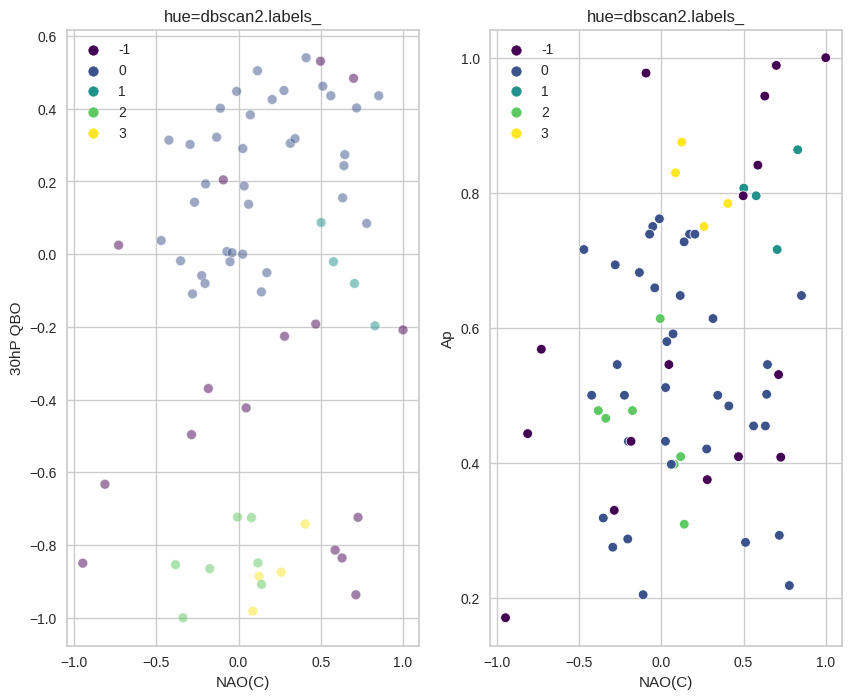

In [ ]:
plt.figure(figsize=(10,8))
plt.subplot(121),  sns.scatterplot(data=invierno, x="NAO(C)", y="30hP QBO" , hue=dbscan2.labels_, palette="viridis" , alpha=0.5), plt.title('hue=dbscan2.labels_')
plt.subplot(122), sns.scatterplot(data=invierno, x="NAO(C)",  y="Ap",palette="viridis", hue=dbscan2.labels_), plt.title('hue=dbscan2.labels_')
plt.show()

Probé con muchísimos valores de eps, casi simpre me da el mismo resultado: 1 cluster. Al final encontré un valor para el cual clusteriza en 2, pero se generaba un grupo muy grande y otro muy muy pequeño, por llegué a aceptar trabajar con más de 2 clusters. El criterio final fue encontrar un eps para el cual el grupo grande no era tan grande, aunque implicaba tener otros 4 grupos más.


Esta vez, este método no clusterizó tan definidamente por los valores de la QBO. No estoy encontrando criterios de separación.

### Correlación

In [ ]:
#genero dataframes, 1 para cada cluster
invierno_DBSCAN__1=df_clustersDB.loc[df_clustersDB['Clusters_DB']==-1,:]
invierno_DBSCAN_0=df_clustersDB.loc[df_clustersDB['Clusters_DB']==0,:]
invierno_DBSCAN_1=df_clustersDB.loc[df_clustersDB['Clusters_DB']==1,:]
invierno_DBSCAN_2=df_clustersDB.loc[df_clustersDB['Clusters_DB']==2,:]
invierno_DBSCAN_3=df_clustersDB.loc[df_clustersDB['Clusters_DB']==3,:]

In [ ]:
print (invierno.corr()['Ap']["NAO(C)"])
print (invierno_DBSCAN__1.corr()['Ap']["NAO(C)"])
print (invierno_DBSCAN_0.corr()['Ap']["NAO(C)"])
print (invierno_DBSCAN_1.corr()['Ap']["NAO(C)"])
print (invierno_DBSCAN_2.corr()['Ap']["NAO(C)"])
print (invierno_DBSCAN_3.corr()['Ap']["NAO(C)"])

0.301861951164188
0.5566324982940508
-0.16287139602929135
0.23604469952955598
-0.409471519093885
-0.6769017612857205


In [ ]:
# INVIERNO
serie1 = invierno['Ap']
serie2 = invierno["NAO(C)"]

correlation_coefficient, _ = stats.pearsonr(serie1, serie2)
n = len(serie1)
degrees_of_freedom = n - 2
t_statistic = correlation_coefficient * np.sqrt((n - 2) / (1 - correlation_coefficient**2))
significance_level = 0.05
critical_t = stats.t.ppf(1 - significance_level / 2, degrees_of_freedom)
print ("invierno")
print ("correlación:", correlation_coefficient)
if np.abs(t_statistic) > critical_t:
    print("SIGNIFICATIVA al nivel de significancia de", significance_level)
else:
    print("NO ES SIGNIFICATIVA al nivel de significancia de", significance_level)
print (" ")


#invierno_DBSCAN__1
serie1 = invierno_DBSCAN__1['Ap']
serie2 = invierno_DBSCAN__1["NAO(C)"]

correlation_coefficient, _ = stats.pearsonr(serie1, serie2)
n = len(serie1)
degrees_of_freedom = n - 2
t_statistic = correlation_coefficient * np.sqrt((n - 2) / (1 - correlation_coefficient**2))
significance_level = 0.05
critical_t = stats.t.ppf(1 - significance_level / 2, degrees_of_freedom)
print ("invierno_DBSCAN__1")
print ("correlación:", correlation_coefficient)
if np.abs(t_statistic) > critical_t:
    print("SIGNIFICATIVA al nivel de significancia de", significance_level)
else:
    print("NO ES SIGNIFICATIVA al nivel de significancia de", significance_level)
print (" ")


#invierno_DBSCAN_0
serie1 = invierno_DBSCAN_0['Ap']
serie2 = invierno_DBSCAN_0["NAO(C)"]

correlation_coefficient, _ = stats.pearsonr(serie1, serie2)
n = len(serie1)
degrees_of_freedom = n - 2
t_statistic = correlation_coefficient * np.sqrt((n - 2) / (1 - correlation_coefficient**2))
significance_level = 0.05
critical_t = stats.t.ppf(1 - significance_level / 2, degrees_of_freedom)
print ("invierno_DBSCAN_0")
print ("correlación:", correlation_coefficient)
if np.abs(t_statistic) > critical_t:
    print("SIGNIFICATIVA al nivel de significancia de", significance_level)
else:
    print("NO ES SIGNIFICATIVA al nivel de significancia de", significance_level)
print (" ")


#invierno_DBSCAN_1
serie1 = invierno_DBSCAN_1['Ap']
serie2 = invierno_DBSCAN_1["NAO(C)"]

correlation_coefficient, _ = stats.pearsonr(serie1, serie2)
n = len(serie1)
degrees_of_freedom = n - 2
t_statistic = correlation_coefficient * np.sqrt((n - 2) / (1 - correlation_coefficient**2))
significance_level = 0.05
critical_t = stats.t.ppf(1 - significance_level / 2, degrees_of_freedom)
print ("invierno_DBSCAN_1")
print ("correlación:", correlation_coefficient)
if np.abs(t_statistic) > critical_t:
    print("SIGNIFICATIVA al nivel de significancia de", significance_level)
else:
    print("NO ES SIGNIFICATIVA al nivel de significancia de", significance_level)
print (" ")


#invierno_DBSCAN_2
serie1 = invierno_DBSCAN_2['Ap']
serie2 = invierno_DBSCAN_2["NAO(C)"]

correlation_coefficient, _ = stats.pearsonr(serie1, serie2)
n = len(serie1)
degrees_of_freedom = n - 2
t_statistic = correlation_coefficient * np.sqrt((n - 2) / (1 - correlation_coefficient**2))
significance_level = 0.05
critical_t = stats.t.ppf(1 - significance_level / 2, degrees_of_freedom)
print ("invierno_DBSCAN_2")
print ("correlación:", correlation_coefficient)
if np.abs(t_statistic) > critical_t:
    print("SIGNIFICATIVA al nivel de significancia de", significance_level)
else:
    print("NO ES SIGNIFICATIVA al nivel de significancia de", significance_level)
print (" ")


#invierno_DBSCAN_3
serie1 = invierno_DBSCAN_3['Ap']
serie2 = invierno_DBSCAN_3["NAO(C)"]

correlation_coefficient, _ = stats.pearsonr(serie1, serie2)
n = len(serie1)
degrees_of_freedom = n - 2
t_statistic = correlation_coefficient * np.sqrt((n - 2) / (1 - correlation_coefficient**2))
significance_level = 0.05
critical_t = stats.t.ppf(1 - significance_level / 2, degrees_of_freedom)
print ("invierno_DBSCAN_3")
print ("correlación:", correlation_coefficient)
if np.abs(t_statistic) > critical_t:
    print("SIGNIFICATIVA al nivel de significancia de", significance_level)
else:
    print("NO ES SIGNIFICATIVA al nivel de significancia de", significance_level)
print (" ")


invierno
correlación: 0.30186195116418785
SIGNIFICATIVA al nivel de significancia de 0.05
 
invierno_DBSCAN__1
correlación: 0.5566324982940511
SIGNIFICATIVA al nivel de significancia de 0.05
 
invierno_DBSCAN_0
correlación: -0.16287139602929107
NO ES SIGNIFICATIVA al nivel de significancia de 0.05
 
invierno_DBSCAN_1
correlación: 0.2360446995295563
NO ES SIGNIFICATIVA al nivel de significancia de 0.05
 
invierno_DBSCAN_2
correlación: -0.409471519093885
NO ES SIGNIFICATIVA al nivel de significancia de 0.05
 
invierno_DBSCAN_3
correlación: -0.6769017612857212
NO ES SIGNIFICATIVA al nivel de significancia de 0.05
 


Interesante encontrar correlaciones tan grandes negrativas para los últimos 2 clusters (2 y 3). Se podría pensar que el comportamiento de la atmósfera en respuesta a la act geomagnética en estos casos es diferente y es justamente el algoritmo es que pudo discriminar esto. Pero para eso es necesario hacer un test de significancia ya que son pocos los datos en esos clusters. Lo ideal sería poder trabajar con más datos.

In [ ]:
invierno_DBSCAN=pd.concat([invierno_DBSCAN__1,invierno_DBSCAN_1,invierno_DBSCAN_2,invierno_DBSCAN_3],ignore_index=True)

print (invierno.corr()['Ap']["NAO(C)"])
print (invierno_DBSCAN_0.corr()['Ap']["NAO(C)"])
print (invierno_DBSCAN.corr()['Ap']["NAO(C)"])

0.301861951164188
-0.16287139602929135
0.5728320677985109


In [ ]:
# INVIERNO
serie1 = invierno['Ap']
serie2 = invierno["NAO(C)"]

correlation_coefficient, _ = stats.pearsonr(serie1, serie2)
n = len(serie1)
degrees_of_freedom = n - 2
t_statistic = correlation_coefficient * np.sqrt((n - 2) / (1 - correlation_coefficient**2))
significance_level = 0.05
critical_t = stats.t.ppf(1 - significance_level / 2, degrees_of_freedom)
print ("correlación:", correlation_coefficient)
if np.abs(t_statistic) > critical_t:
    print("SIGNIFICATIVA al nivel de significancia de", significance_level)
else:
    print("NO ES SIGNIFICATIVA al nivel de significancia de", significance_level)

#invierno_DBSCAN_0
serie1 = invierno_DBSCAN_0['Ap']
serie2 = invierno_DBSCAN_0["NAO(C)"]

correlation_coefficient, _ = stats.pearsonr(serie1, serie2)
n = len(serie1)
degrees_of_freedom = n - 2
t_statistic = correlation_coefficient * np.sqrt((n - 2) / (1 - correlation_coefficient**2))
significance_level = 0.05
critical_t = stats.t.ppf(1 - significance_level / 2, degrees_of_freedom)
print ("correlación:", correlation_coefficient)
if np.abs(t_statistic) > critical_t:
    print("SIGNIFICATIVA al nivel de significancia de", significance_level)
else:
    print("NO ES SIGNIFICATIVA al nivel de significancia de", significance_level)

#invierno_DBSCAN
serie1 = invierno_DBSCAN['Ap']
serie2 = invierno_DBSCAN["NAO(C)"]

correlation_coefficient, _ = stats.pearsonr(serie1, serie2)
n = len(serie1)
degrees_of_freedom = n - 2
t_statistic = correlation_coefficient * np.sqrt((n - 2) / (1 - correlation_coefficient**2))
significance_level = 0.05
critical_t = stats.t.ppf(1 - significance_level / 2, degrees_of_freedom)
print ("correlación:", correlation_coefficient)
if np.abs(t_statistic) > critical_t:
    print("SIGNIFICATIVA al nivel de significancia de", significance_level)
else:
    print("NO ES SIGNIFICATIVA al nivel de significancia de", significance_level)

correlación: 0.30186195116418785
SIGNIFICATIVA al nivel de significancia de 0.05
correlación: -0.16287139602929107
NO ES SIGNIFICATIVA al nivel de significancia de 0.05
correlación: 0.5728320677985114
SIGNIFICATIVA al nivel de significancia de 0.05


Aquí junté todos los clusters con pocos datos y se llega a correlaciones de valores parecidos a los anteriores (encontrados en otros métodos)